## Description
### Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

You need to identify the best possible model that will give the required performance

### Objective

* Explore and visualize the dataset.
* Build a classification model to predict if the customer is going to churn or not
* Optimize the model using appropriate techniques
* Generate a set of insights and recommendations that will help the bank

### Data Dictionary:

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
* Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
* Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
* Avg_Utilization_Ratio: Represents how much of the available credit the customer spent

In [1]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np
import sklearn
import sys

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer
)
import shap
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# to plot the performance with addition of each feature
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

#For kfold validation pipelines
from imblearn.pipeline import make_pipeline
from statistics import mean
from statistics import stdev

In [2]:
data = pd.read_csv('BankChurners.csv')

In [3]:
df = data.copy()

In [4]:
df.shape

(10127, 21)

There are 10127 entries with 21 columns describing them.

In [5]:
df.head(5)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

CLIENTNUM can reasonably be a unique identifier. This means I need to keep it in while checking for duplicates

In [6]:
#checking for duplicates
df.duplicated().sum()

0

There are no duplicates. Now I can just drop it.

In [7]:
df.drop(['CLIENTNUM'],axis=1,inplace=True)

In [8]:
#Now to check out data types and look for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

Education level and Marital Status has null values. I'll check them when I get to them in the EDA.



In [9]:
#Separating the columns by category or numerical for easier analysis later
cat_columns = ['Attrition_Flag',
               'Gender',
               'Dependent_count',
               'Education_Level',
               'Marital_Status',
               'Income_Category',
               'Card_Category',
               'Total_Relationship_Count',
               'Months_Inactive_12_mon',
               'Contacts_Count_12_mon']

In [10]:
#Grabbing the numericals automatically.
num_columns = []
for column in df.columns:
    if column not in cat_columns:
        num_columns.append(column)

In [11]:
# Printing number of count of each unique value in each column
for column in cat_columns:
    print(df[column].value_counts())
    print("-" * 40)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
----------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
----------------------------------------
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64
----------------------------------------
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
----------------------------------------
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
----------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
----------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: 

Observations:

* Our target variable (attrition) is very unbalanced
* Our sample is highly educated overall.
* abc is clearly an error for income categories. We'll have to look into that.

In [12]:
#looking at the continuous numercial columns
df[num_columns].describe().round(1).T

count    mean     std     min     25%     50%  \
Customer_Age           10127.0    46.3     8.0    26.0    41.0    46.0   
Months_on_book         10127.0    35.9     8.0    13.0    31.0    36.0   
Credit_Limit           10127.0  8632.0  9088.8  1438.3  2555.0  4549.0   
Total_Revolving_Bal    10127.0  1162.8   815.0     0.0   359.0  1276.0   
Avg_Open_To_Buy        10127.0  7469.1  9090.7     3.0  1324.5  3474.0   
Total_Amt_Chng_Q4_Q1   10127.0     0.8     0.2     0.0     0.6     0.7   
Total_Trans_Amt        10127.0  4404.1  3397.1   510.0  2155.5  3899.0   
Total_Trans_Ct         10127.0    64.9    23.5    10.0    45.0    67.0   
Total_Ct_Chng_Q4_Q1    10127.0     0.7     0.2     0.0     0.6     0.7   
Avg_Utilization_Ratio  10127.0     0.3     0.3     0.0     0.0     0.2   

                           75%      max  
Customer_Age              52.0     73.0  
Months_on_book            40.0     56.0  
Credit_Limit           11067.5  34516.0  
Total_Revolving_Bal     1784.0   2517.0  
Avg_Open_To_Buy         9859.0  34516.0  
Total_Amt_Chng_Q4_Q1       0.9      3.4  
Total_Trans_Amt         4741.0  18484.0  
Total_Trans_Ct            81.0    139.0  
Total_Ct_Chng_Q4_Q1        0.8      3.7  
Avg_Utilization_Ratio      0.5      1.0

Observations
* Some major outliers for credit limit, avg open to buy, total trans amt, and total ct chng.
* Huge difference in scale, columns will need to be scaled.

Time to start looking at each column individually.

# EDA and Preprocessing

First some functions to help me analyze everything.

In [13]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [14]:
# function to create labeled barplots for our categorical variables


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [15]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [16]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [17]:
def outlier_ID(df,column,IQRMultiplier):
    #Pulling the quartiles
    quartiles = np.quantile(df[column][df[column].notnull()],[.25,.75])
    #Multiplying quartiles by IQRMultiplier for an extended 'whisker'
    power_iqr = IQRMultiplier * (quartiles[1] - quartiles[0])
    #printing our quartiles for reference
    print(f'The quartiles for {column} are the following: Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, {IQRMultiplier}*IQR = {power_iqr}')
    #Identifying which values are outside IQR by the multiplier
    outlier = df.loc[np.abs(df[column] - df[column].median()) >
                            power_iqr, column]
    return outlier.sort_values(ascending = False)

## Categorical Variables

### Observations on Attrition_Flag

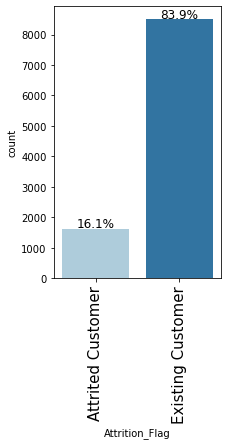

In [18]:
labeled_barplot(df,'Attrition_Flag',perc=True)

This is our target variable. We'll look at how it interacts with all of the other variables later. For now, we can see that it is extremely unbalanced, with only 16.1% customers having attrited.

In [19]:
#counting number of null values
df['Attrition_Flag'].isna().sum()

0

No missing values. I'll want to encode it to 0 and 1, though.

In [20]:
#First converting this column to category
df['Attrition_Flag'] = df['Attrition_Flag'].astype('category')
#Now assigning each category a number.
df['Attrition_Flag'].replace('Attrited Customer',1, inplace=True) #target is 1
df['Attrition_Flag'].replace('Existing Customer',0, inplace=True)

For reference:

* 0 = Existing Customer
* 1 = Attrited Customer

### Observations on Gender

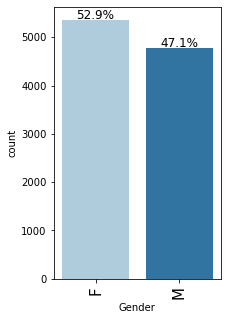

In [21]:
labeled_barplot(df,'Gender',perc=True)

Observations:
* Gender is fairly balanced, though there are slightly more females than males.

In [22]:
#counting number of null values
df['Gender'].isna().sum()

0

In [23]:
#First converting this column to category
df['Gender'] = df['Gender'].astype('category')
#Now assigning each category a number.
df['Gender'] = df.Gender.cat.codes

For reference:
* 0 = female
* 1 = male

### Observations on Dependent_count

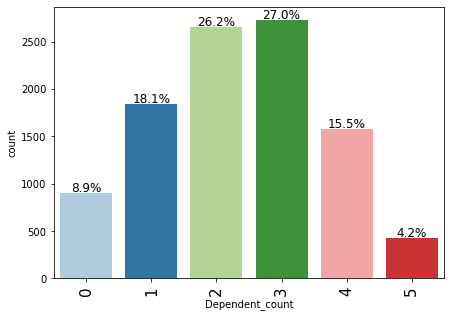

In [24]:
labeled_barplot(df,'Dependent_count',perc=True)

Observations:
* That's a very nice bell curve.
* No outliers or strange entries

In [25]:
#counting number of null values
df['Dependent_count'].isna().sum()

0

In [26]:
#converting this column to integer.
df['Dependent_count'] = df['Dependent_count'].astype('int64')

### Observations on Education_Level

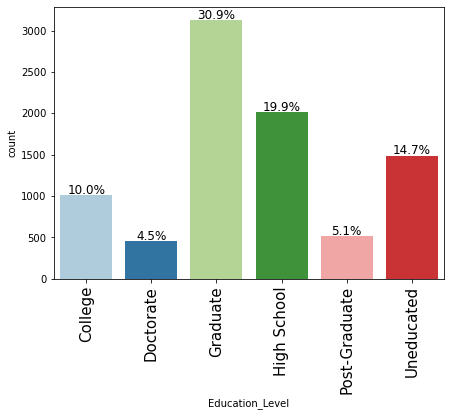

In [27]:
labeled_barplot(df,'Education_Level',perc=True)

Observations
* Education is hierarchical, and so should be ordered. Currently, it is out of order.
* Our sample is far more educated than the average person.

In [28]:
#counting number of null values
df['Education_Level'].isna().sum()

1519

Lots of missing values there. Let's take a quick look.

In [29]:
df[df['Education_Level'].isna()==True]

Attrition_Flag  Customer_Age  Gender  Dependent_count Education_Level  \
6                  0            51       1                4             NaN   
11                 0            65       1                1             NaN   
15                 0            44       1                4             NaN   
17                 0            41       1                3             NaN   
23                 0            47       0                4             NaN   
...              ...           ...     ...              ...             ...   
10090              0            36       0                3             NaN   
10094              0            59       1                1             NaN   
10095              0            46       1                3             NaN   
10118              1            50       1                1             NaN   
10123              1            41       1                2             NaN   

      Marital_Status Income_Category Card_Category  Months_on_book  \
6            Married         $120K +          Gold              46   
11           Married     $40K - $60K          Blue              54   
15               NaN    $80K - $120K          Blue              37   
17           Married    $80K - $120K          Blue              34   
23            Single  Less than $40K          Blue              36   
...              ...             ...           ...             ...   
10090        Married     $40K - $60K          Blue              22   
10094         Single     $60K - $80K          Blue              48   
10095        Married    $80K - $120K          Blue              33   
10118            NaN    $80K - $120K          Blue              36   
10123       Divorced     $40K - $60K          Blue              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
6                             6                       1   
11                            6                       2   
15                            5                       1   
17                            4                       4   
23                            3                       3   
...                         ...                     ...   
10090                         5                       3   
10094                         3                       1   
10095                         4                       1   
10118                         6                       3   
10123                         4                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
6                          3       34516.0                 2264   
11                         3        9095.0                 1587   
15                         2        4234.0                  972   
17                         1       13535.0                 1291   
23                         2        2492.0                 1560   
...                      ...           ...                  ...   
10090                      3       12958.0                 2273   
10094                      2        7288.0                    0   
10095                      3       34516.0                 1099   
10118                      4        9959.0                  952   
10123                      3        4277.0                 2186   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
6              32252.0                 1.975             1330              31   
11              7508.0                 1.433             1314              26   
15              3262.0                 1.707             1348              27   
17             12244.0                 0.653             1028              21   
23               932.0                 0.573             1126              23   
...                ...                   ...              ...             ...   
10090          10685.0                 0.608            15681              96   
10094           7288.0                 0.640          

They seem to be missing at random. We'll impute them when we impute the others. In the meantime, we should re-order this and turn the categories into numbers.

In [30]:
edu_map = {'Uneducated': 0, 'High School': 1, 'College': 2, 'Graduate': 3,
          'Post-Graduate': 4, 'Doctorate': 5}
df['Education_Level'] = df['Education_Level'].map(edu_map)

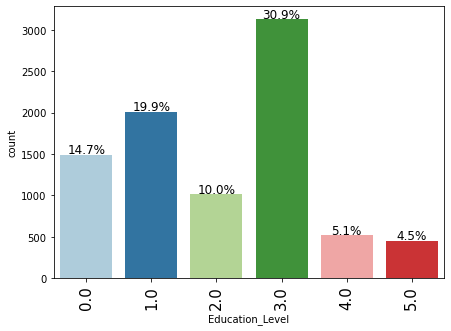

In [31]:
labeled_barplot(df,'Education_Level',perc=True)

There, now properly ordered by higher = more educated.

For reference:
* 'Uneducated': 0,
* 'High School': 1,
* 'College': 2,
* 'Graduate': 3,
* 'Post-Graduate': 4,
* 'Doctorate': 5

### Observations on Marital_Status

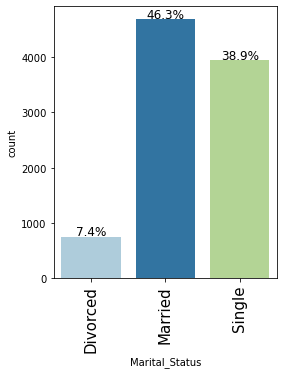

In [32]:
labeled_barplot(df,'Marital_Status',perc=True)

In [33]:
#counting number of null values
df['Marital_Status'].isna().sum()

749

Let's take a look at them.

In [34]:
df[df['Marital_Status'].isna()==True]

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
3                  0            40       0                4              1.0   
7                  0            32       1                0              1.0   
10                 0            42       1                5              0.0   
13                 0            35       1                3              3.0   
15                 0            44       1                4              NaN   
...              ...           ...     ...              ...              ...   
10070              0            47       1                3              1.0   
10100              0            39       1                2              3.0   
10101              0            42       1                2              3.0   
10118              1            50       1                1              NaN   
10125              1            30       1                2              3.0   

      Marital_Status Income_Category Card_Category  Months_on_book  \
3                NaN  Less than $40K          Blue              34   
7                NaN     $60K - $80K        Silver              27   
10               NaN         $120K +          Blue              31   
13               NaN     $60K - $80K          Blue              30   
15               NaN    $80K - $120K          Blue              37   
...              ...             ...           ...             ...   
10070            NaN    $80K - $120K        Silver              40   
10100            NaN     $60K - $80K        Silver              36   
10101            NaN     $40K - $60K          Blue              30   
10118            NaN    $80K - $120K          Blue              36   
10125            NaN     $40K - $60K          Blue              36   

       Total_Relationship_Count  Months_Inactive_12_mon  \
3                             3                       4   
7                             2                       2   
10                            5                       3   
13                            5                       1   
15                            5                       1   
...                         ...                     ...   
10070                         5                       3   
10100                         4                       2   
10101                         3                       2   
10118                         6                       3   
10125                         4                       3   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
3                          1        3313.0                 2517   
7                          2       29081.0                 1396   
10                         2        6748.0                 1467   
13                         3        8547.0                 1666   
15                         2        4234.0                  972   
...                      ...           ...                  ...   
10070                      2       34516.0                 1371   
10100                      2       29808.0                    0   
10101                      5        3735.0                 1723   
10118                      4        9959.0                  952   
10125                      3        5281.0                    0   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
3                796.0                 1.405             1171              20   
7              27685.0                 2.204             1538              36   
10              5281.0                 0.831             1201              42   
13              6881.0                 1.163             1311              33   
15              3262.0                 1.707             1348              27   
...                ...                   ...              ...             ...   
10070          33145.0                 0.691            15930             123   
10100          29808.0                 0.6

Seems to be missing at random. We'll have to impute these later. This category is not hierarchical, so I'm going to make dummies after I impute.

For the imputation, though, I need to make these numbers.

In [35]:
#First converting this column to category
df['Marital_Status'] = df['Marital_Status'].astype('category')
#Now assigning each category a number.
df['Marital_Status'] = df.Marital_Status.cat.codes
#Cat codes gives NaN a category, so I'm going to make it NaN again
df['Marital_Status'].replace(-1,np.NaN, inplace=True)

For reference:
* Divorced : 0
* Married : 1
* Single : 2

### Observations on Income_Category

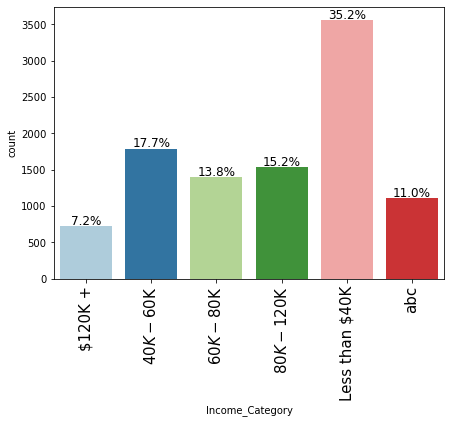

In [36]:
labeled_barplot(df,'Income_Category',perc=True)

Observations:
* Annoyingly, not all categories are equally spaced. 80k-120k had a range of 40k whereas the others have 20k. Oh well.
* Not ordered properly considering their hierarchical status. Their order should be reversed.
* abc is clearly a mistake. It is not misnamed because there are no missing gaps between. abc should be considering missing.
* Sample is not very wealthy, with very few making any money despite their education (and likely accompanying crushing student loans).

In [37]:
#Removing abc from Income_Category by putting NaN in its place
df['Income_Category'].replace('abc',np.NaN, inplace=True)

In [38]:
#counting number of null values
df['Income_Category'].isna().sum()

1112

In [39]:
#That's a lot, let's look at them
df[df['Income_Category'].isna()==True]

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
19                 0            45       0                2              3.0   
28                 0            44       0                3              0.0   
39                 1            66       0                0              5.0   
44                 0            38       0                4              3.0   
58                 0            44       0                5              3.0   
...              ...           ...     ...              ...              ...   
10021              1            30       0                1              3.0   
10040              1            50       0                3              5.0   
10083              0            42       0                4              0.0   
10092              1            40       0                3              3.0   
10119              1            55       0                3              0.0   

       Marital_Status Income_Category Card_Category  Months_on_book  \
19                1.0             NaN          Blue              37   
28                2.0             NaN          Blue              34   
39                1.0             NaN          Blue              56   
44                2.0             NaN          Blue              28   
58                1.0             NaN          Blue              35   
...               ...             ...           ...             ...   
10021             1.0             NaN          Blue              18   
10040             2.0             NaN          Blue              36   
10083             1.0             NaN          Blue              23   
10092             1.0             NaN          Blue              25   
10119             2.0             NaN          Blue              47   

       Total_Relationship_Count  Months_Inactive_12_mon  \
19                            6                       1   
28                            5                       2   
39                            5                       4   
44                            2                       3   
58                            4                       1   
...                         ...                     ...   
10021                         4                       1   
10040                         4                       3   
10083                         4                       1   
10092                         1                       2   
10119                         4                       3   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
19                         2       14470.0                 1157   
28                         2       10100.0                    0   
39                         3        7882.0                  605   
44                         3        9830.0                 2055   
58                         2        6273.0                  978   
...                      ...           ...                  ...   
10021                      4        4377.0                 2517   
10040                      3        5173.0                    0   
10083                      2        8348.0                    0   
10092                      3        6888.0                 1878   
10119                      3       14657.0                 2517   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
19             13313.0                 0.966             1207              21   
28             10100.0                 0.525             1052              18   
39              7277.0                 1.052              704              16   
44              7775.0                 0.977             1042              23   
58              5295.0                 2.275             1359              25   
...                ...                   ...              ...             ...   
10021           1860.0                 0.941             8759              74   
10040           5173.0        

In [40]:
#Are they all Blue Cards?
len(df[(df['Income_Category'].isna()==True) &
   (df['Card_Category']=='Blue')])

1045

Not all of them are Blue Cards. The majority of them being Blue isn't weird as there are many more Blue Cards than any other card category.

Besides that, I don't see a patern. Seems to be Missing at Random.

Let's make this category hierarchical in ascending order so it is easier to interpret and work with.

In [41]:
inc_map = {'Less than $40K': 0, '$40K - $60K': 1, '$60K - $80K': 2,
           '$80K - $120K': 3, '$120K +': 4}
df['Income_Category'] = df['Income_Category'].map(inc_map)

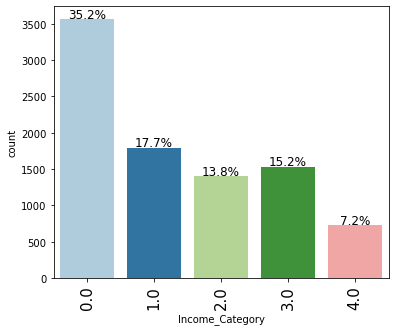

In [42]:
labeled_barplot(df,'Income_Category',perc=True)

For reference:

* Less than 40K: 0,
* 40K - 60K: 1,
* 60K - 80K: 2,
* 80K - 120K: 3,
* 120K +: 4

### Observations on Card_Category

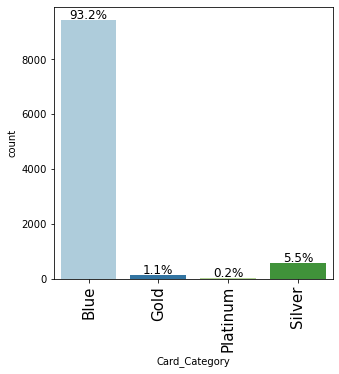

In [43]:
labeled_barplot(df,'Card_Category',perc=True)

Observations:
* Highly imbalanced with 93.2% of sample being blue card holders
* Not hierarchical. It could be said that platinum is "better" than Blue, but it is unclear how it would be so because we don't know the differences in the cards. We will have to dummy these.

In [44]:
#counting number of null values
df['Card_Category'].isna().sum()

0

No NaN, so we can go ahead and dummy these right now.

In [45]:
#Make the dummies
card_dummies = pd.get_dummies(df['Card_Category'],drop_first=True)
#Add them to the current df
df = pd.concat([df,card_dummies],axis=1)

We'll drop the original after I've finished the EDA so I can see its interactions with the other variables easier.

In [46]:
# Updating cat_columns
newcols = ['Gold','Platinum','Silver']

for i in newcols:
    cat_columns.append(i)
cat_columns

['Attrition_Flag',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Gold',
 'Platinum',
 'Silver']

### Observations on Total_Relationship_Count

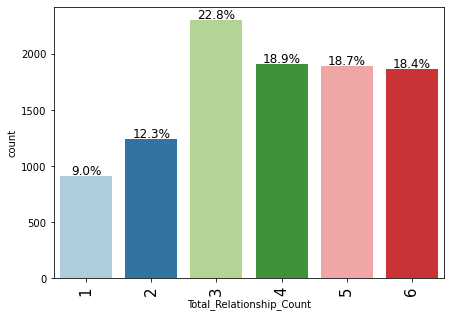

In [47]:
labeled_barplot(df,'Total_Relationship_Count',perc=True)

The number of products each customer uses is fairly consistent. Nothing special here. No outliers or weird values.

In [48]:
#counting number of null values
df['Total_Relationship_Count'].isna().sum()

0

Everything checks out. Nothing to change.

### Observations on Months_Inactive_12_mon

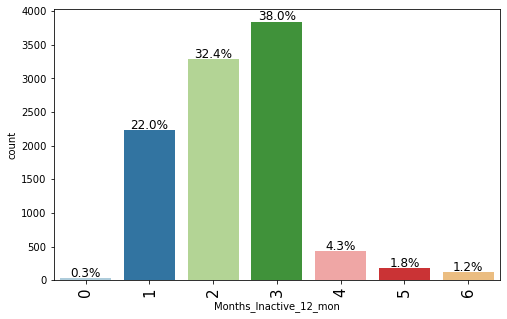

In [49]:
labeled_barplot(df,'Months_Inactive_12_mon',perc=True)

Observations
* It seems highly unusual to remain inactive for more than 3 months.
* What 'inactive' means is ambiguous. Don't use their card? Don't pay their card down?
* Not normally distributed but no large outliers.
* 0s and 6s won't be dropped as they represent real trends.

In [50]:
#counting number of null values
df['Months_Inactive_12_mon'].isna().sum()

0

No further changes are needed.

### Observations on Contacts_Count_12_mon

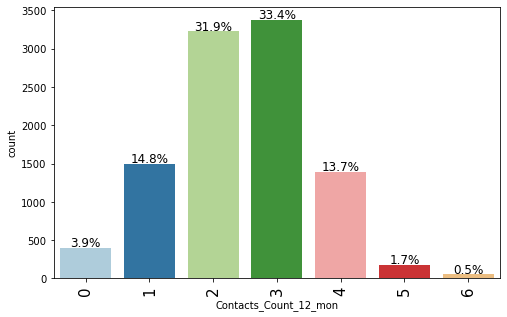

In [51]:
labeled_barplot(df,'Contacts_Count_12_mon',perc=True)

Observations
* "Contacts" is ambigous. Phone calls? Payments? Purchases?
* Fairly normally distributed
* No outliers or unreasonable data

In [52]:
#counting number of null values
df['Contacts_Count_12_mon'].isna().sum()

0

No changes or tweaks needed.

## Numerical Variables

### Observations on Customer_Age

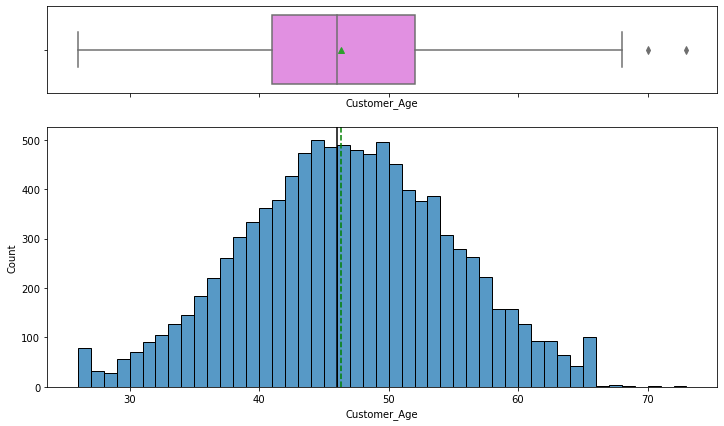

In [53]:
histogram_boxplot(df, 'Customer_Age')

In [54]:
print("Column: Customer_Age has skewness ",df['Customer_Age'].skew())

Column: Customer_Age has skewness  -0.033605016317173456


In [55]:
#Checking quartiles for outliers
outlier_ID(df,'Customer_Age',2)

The quartiles for Customer_Age are the following: Q1 = 41.0, Q3 = 52.0, 2*IQR = 22.0


251    73
254    70
Name: Customer_Age, dtype: int64

In [56]:
#counting number of null values
df['Customer_Age'].isna().sum()

0

Observations:

* What a pretty bell curve. Normally distributed. Almost no skew.
* Outliers are reasonable ages. No need to treat.
* Overall sample seems around middle-aged, with many fewer young people.

### Observations on Months_on_book

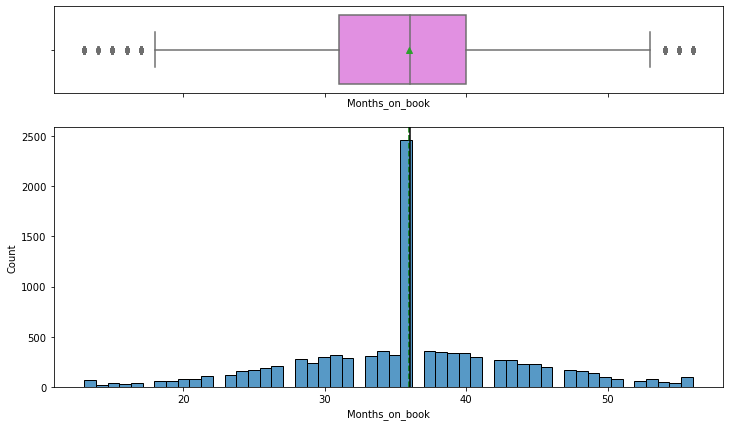

In [57]:
histogram_boxplot(df, 'Months_on_book')

In [58]:
print("Column: Months_on_book has skewness ",df['Months_on_book'].skew())

Column: Months_on_book has skewness  -0.10656535989402989


In [59]:
#Checking quartiles for outliers
outlier_ID(df,'Months_on_book',2)

The quartiles for Months_on_book are the following: Q1 = 31.0, Q3 = 40.0, 2*IQR = 18.0


18      56
2693    56
27      56
2821    56
2919    56
        ..
2284    13
890     13
1462    13
7570    13
1503    13
Name: Months_on_book, Length: 333, dtype: int64

In [60]:
#counting number of null values
df['Months_on_book'].isna().sum()

0

Observations:

* Insane central spike is very weird.
* Almost no skew.
* Outliers seem reasonable enough, no need to treat
* Periodic missing gaps are very weird given the otherwise normal curve

That's a pretty insane central spike. I want to check that out.

In [61]:
# I want to look at the actual numbers of that graph.
df['Months_on_book'].value_counts().sort_index()

13      70
14      16
15      34
16      29
17      39
18      58
19      63
20      74
21      83
22     105
23     116
24     160
25     165
26     186
27     206
28     275
29     241
30     300
31     318
32     289
33     305
34     353
35     317
36    2463
37     358
38     347
39     341
40     333
41     297
42     271
43     273
44     230
45     227
46     197
47     171
48     162
49     141
50      96
51      80
52      62
53      78
54      53
55      42
56     103
Name: Months_on_book, dtype: int64

From this we can see that the gaps in the graph are visual only. There are no counts with zero entries, or huge drops in an otherwise normal trend.

However, suddenly adding 2000 entries on 36 is extremely suspicious.

Without additional information I don't think I can do anything to it. I'm tempted to make them all NaN and re-distribute, but that's an extreme action and I don't know if this count is actually false.

### Observations on Credit_Limit

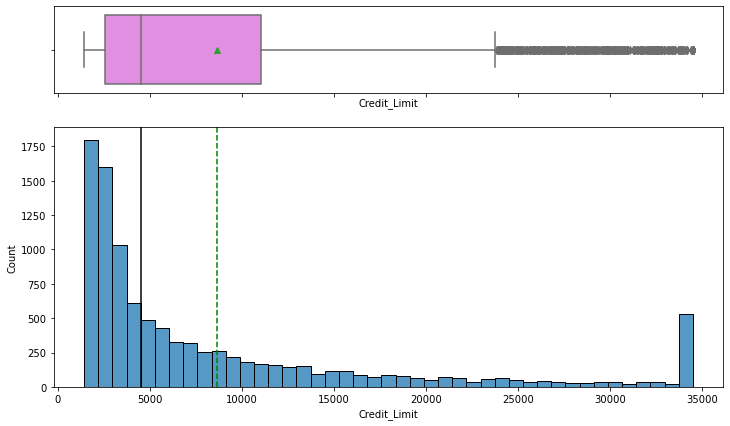

In [62]:
histogram_boxplot(df, 'Credit_Limit')

In [63]:
print("Column: Credit_Limit has skewness ",df['Credit_Limit'].skew())

Column: Credit_Limit has skewness  1.666725807993647


In [64]:
#Checking quartiles for outliers
outlier_ID(df,'Credit_Limit',3)

The quartiles for Credit_Limit are the following: Q1 = 2555.0, Q3 = 11067.5, 3*IQR = 25537.5


6       34516.0
8813    34516.0
8714    34516.0
8721    34516.0
8733    34516.0
         ...   
1986    30210.0
6092    30186.0
9048    30172.0
3037    30137.0
8985    30117.0
Name: Credit_Limit, Length: 664, dtype: float64

In [65]:
#counting number of null values
df['Credit_Limit'].isna().sum()

0

Observations:

* Highly skewed
* The large spike at the top may be real: the bank could just have a maximum credit and these are the customers who hit the max.

Let's look at that weird tail spike.

In [66]:
df[df['Credit_Limit']==34516]

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
6                  0            51       1                4              NaN   
45                 0            49       1                4              0.0   
61                 1            48       1                2              3.0   
65                 0            51       1                4              0.0   
70                 0            51       1                4              3.0   
...              ...           ...     ...              ...              ...   
10088              0            45       1                2              3.0   
10095              0            46       1                3              NaN   
10098              1            55       1                3              3.0   
10110              0            56       1                1              3.0   
10112              1            33       1                2              2.0   

       Marital_Status  Income_Category Card_Category  Months_on_book  \
6                 1.0              4.0          Gold              46   
45                2.0              3.0          Blue              30   
61                1.0              2.0        Silver              35   
65                2.0              3.0        Silver              38   
70                2.0              4.0          Blue              42   
...               ...              ...           ...             ...   
10088             2.0              2.0        Silver              33   
10095             1.0              3.0          Blue              33   
10098             2.0              4.0        Silver              36   
10110             2.0              3.0        Silver              49   
10112             1.0              4.0          Gold              20   

       Total_Relationship_Count  Months_Inactive_12_mon  \
6                             6                       1   
45                            3                       2   
61                            2                       4   
65                            4                       1   
70                            3                       2   
...                         ...                     ...   
10088                         4                       2   
10095                         4                       1   
10098                         4                       3   
10110                         5                       2   
10112                         2                       1   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
6                          3       34516.0                 2264   
45                         3       34516.0                    0   
61                         4       34516.0                    0   
65                         4       34516.0                 1515   
70                         3       34516.0                 1763   
...                      ...           ...                  ...   
10088                      2       34516.0                 1529   
10095                      3       34516.0                 1099   
10098                      4       34516.0                    0   
10110                      2       34516.0                 1091   
10112                      4       34516.0                    0   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
6              32252.0                 1.975             1330              31   
45             34516.0                 1.621             1444              28   
61             34516.0                 0.763              691              15   
65             33001.0                 0.592             1293              32   
70             32753.0                 1.266             1550              41   
...                ...                   ...              ...             ...   
10088          32987.0                 0.609            13940             105   
10095          334

They're all men?

In [67]:
wmz = len(df[(df['Credit_Limit']==34516) & (df['Gender']==0)])
print(f'Max credit women:{wmz}')
mnz = len(df[(df['Credit_Limit']==34516) & (df['Gender']==1)])
print(f'Max credit men:{mnz}')

Max credit women:40
Max credit men:468


Well that's interesting, especially given our sample has more women than men. Ultimately it's just a data point, though, not an error to fix.

I want this to have a more normal distribution and to be scaled properly. I'm going to log10 it.

In [68]:
df['Credit_Limit'] = np.log10(df['Credit_Limit'])

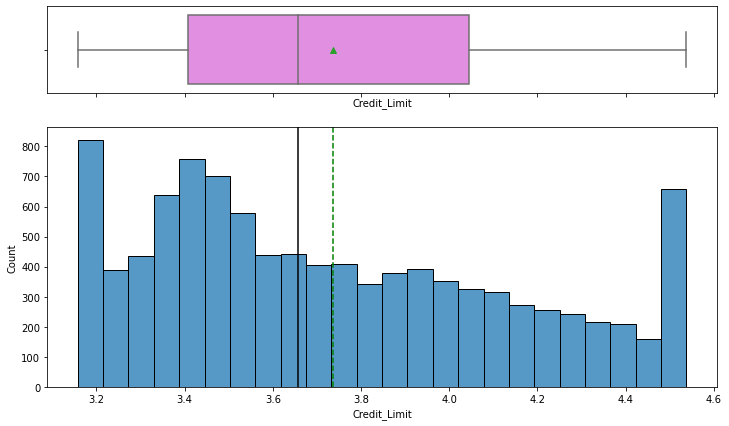

In [69]:
histogram_boxplot(df, 'Credit_Limit')

Better scaling and took care of those outliers.

### Observations on Total_Revolving_Bal

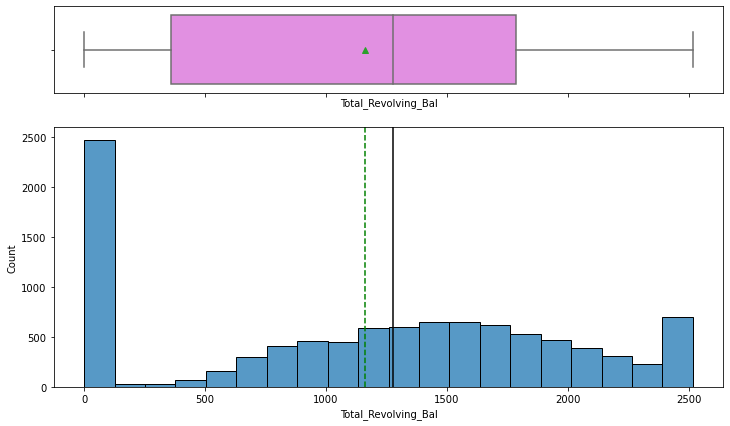

In [70]:
histogram_boxplot(df, 'Total_Revolving_Bal')

In [71]:
print("Column: Total_Revolving_Bal has skewness ",df['Total_Revolving_Bal'].skew())

Column: Total_Revolving_Bal has skewness  -0.14883725028007228


In [72]:
#Checking quartiles for outliers
outlier_ID(df,'Total_Revolving_Bal',2)

The quartiles for Total_Revolving_Bal are the following: Q1 = 359.0, Q3 = 1784.0, 2*IQR = 2850.0


Series([], Name: Total_Revolving_Bal, dtype: int64)

In [73]:
#counting number of null values
df['Total_Revolving_Bal'].isna().sum()

0

Observations:
* A lot of zeroes, but this is not unreasonable
* No outliers
* Not a lot of skew outside of the zeroes

In [74]:
#exactly how many zeroes is that?
len(df[df['Total_Revolving_Bal']==0])

2470

I considered making a separate column to represent this, but I think if we use non-parametric models we'll bypass this problem.

### Observations on Avg_Open_To_Buy

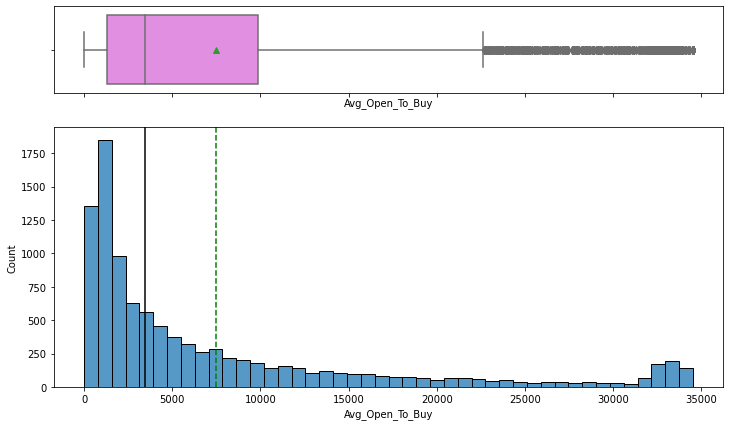

In [75]:
histogram_boxplot(df, 'Avg_Open_To_Buy')

In [76]:
print("Column: Avg_Open_To_Buy has skewness ",df['Avg_Open_To_Buy'].skew())

Column: Avg_Open_To_Buy has skewness  1.6616965459311595


In [77]:
#Checking quartiles for outliers
outlier_ID(df,'Avg_Open_To_Buy',2)

The quartiles for Avg_Open_To_Buy are the following: Q1 = 1324.5, Q3 = 9859.0, 2*IQR = 17069.0


10112    34516.0
9012     34516.0
3665     34516.0
3682     34516.0
4108     34516.0
          ...   
4137     20599.0
1342     20588.0
1204     20584.0
2596     20569.0
9111     20565.0
Name: Avg_Open_To_Buy, Length: 1134, dtype: float64

In [78]:
#counting number of null values
df['Avg_Open_To_Buy'].isna().sum()

0

Observations:
* Significant skew.
* This variable means "how close the customer is to maxing out their card." Thus its distribution being similar to the credit limit makes sense. It also shows that a lot of the customers with maximum credit limits diligently pay their bills every month, as this is variable is the same as their limit.
* Lots of outliers. The min is 3, not 0, so I can actually log10 this one to get rid of outliers and reduce skew.

In [79]:
df['Avg_Open_To_Buy'] = np.log10(df['Avg_Open_To_Buy'])

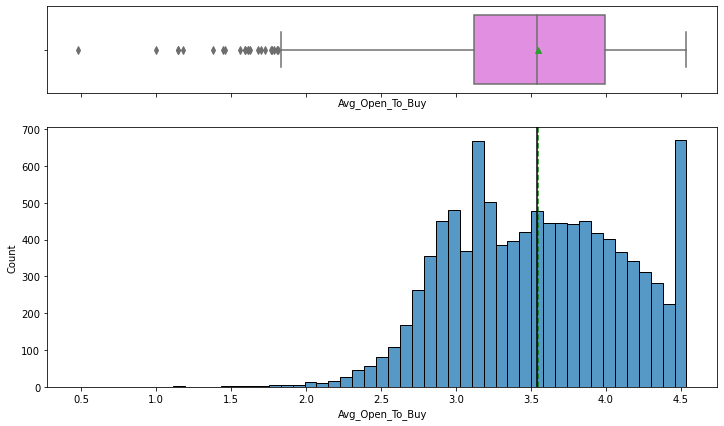

In [80]:
histogram_boxplot(df, 'Avg_Open_To_Buy')

In [81]:
print("Column: Avg_Open_To_Buy has skewness ",df['Avg_Open_To_Buy'].skew())

Column: Avg_Open_To_Buy has skewness  -0.10013152714089592


Oddly I got some outliers on the low end now, but the skew is almost eliminated so I'll keep the treatment.

### Observations on Total_Amt_Chng_Q4_Q1

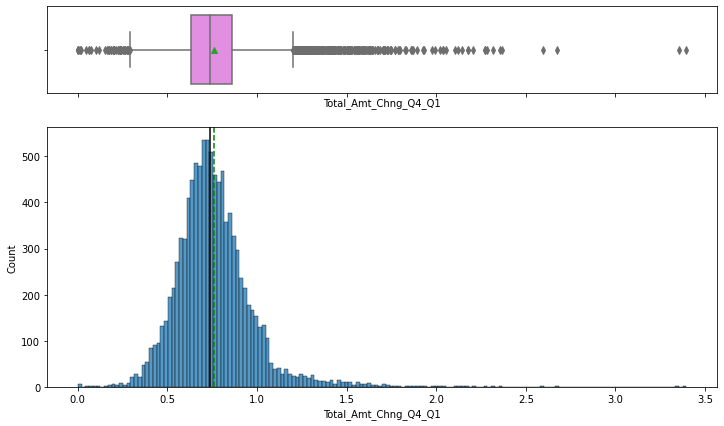

In [82]:
histogram_boxplot(df, 'Total_Amt_Chng_Q4_Q1')

In [83]:
print("Column: Total_Amt_Chng_Q4_Q1 has skewness ",df['Total_Amt_Chng_Q4_Q1'].skew())

Column: Total_Amt_Chng_Q4_Q1 has skewness  1.7320634114286038


In [84]:
#Checking quartiles for outliers
outlier_ID(df,'Total_Amt_Chng_Q4_Q1',3)

The quartiles for Total_Amt_Chng_Q4_Q1 are the following: Q1 = 0.631, Q3 = 0.859, 3*IQR = 0.6839999999999999


12      3.397
8       3.355
773     2.675
2       2.594
219     2.368
        ...  
7207    0.000
3596    0.000
4701    0.000
4417    0.000
7998    0.000
Name: Total_Amt_Chng_Q4_Q1, Length: 158, dtype: float64

In [85]:
#counting number of null values
df['Total_Amt_Chng_Q4_Q1'].isna().sum()

0

Observations:
* Good bell curve except for some extreme outliers
* Skew is high because of the outliers
* Outliers may be due to prolific holiday shoppers

In [86]:
#High ratios means they suddenly increased their number of purchases.
# Maybe this is related to attrition?
print(len(df[(df['Total_Amt_Chng_Q4_Q1']>1)]))
len(df[(df['Total_Amt_Chng_Q4_Q1']>1) & (df['Attrition_Flag']==1)])

993


142

The attrition rate is actually slightly lower for those with high ratios than those with low ratios. Go figure.
We'll have to wait for the bivariate analyses for more info here.

I'm going to treat this by sqrt to get rid of the skew. Hopefully this also treats the outliers.

In [87]:
df['Total_Amt_Chng_Q4_Q1'] = np.sqrt(df['Total_Amt_Chng_Q4_Q1'])

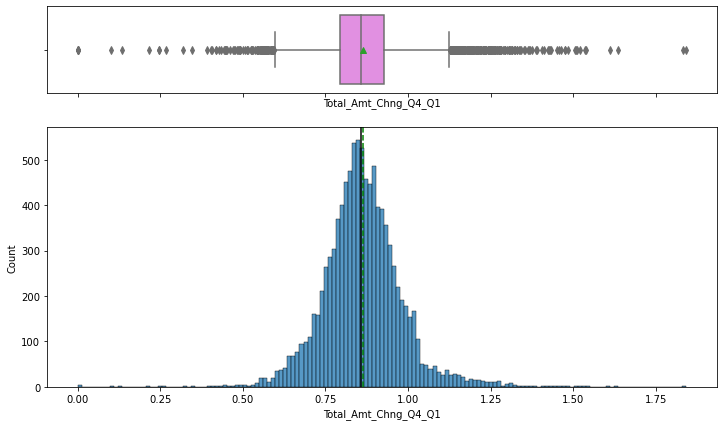

In [88]:
histogram_boxplot(df, 'Total_Amt_Chng_Q4_Q1')

In [89]:
print("Column: Total_Amt_Chng_Q4_Q1 has skewness ",df['Total_Amt_Chng_Q4_Q1'].skew())

Column: Total_Amt_Chng_Q4_Q1 has skewness  0.38928685171442506


Well, skew is gone, though the outliers sadly remain. It's real data, so I won't drop them or cap them.

### Observations on Total_Trans_Amt

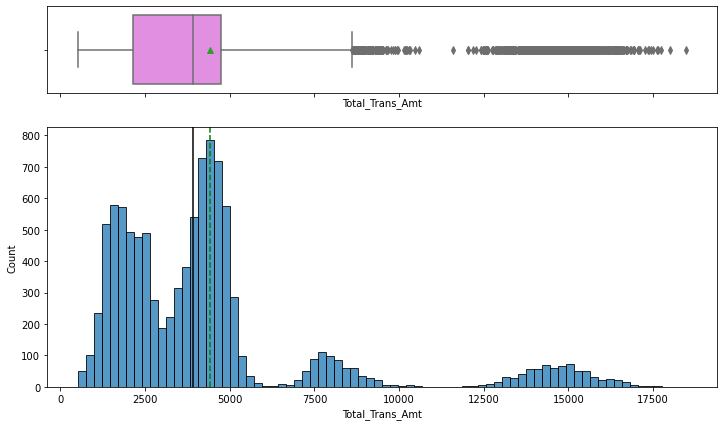

In [90]:
histogram_boxplot(df, 'Total_Trans_Amt')

In [91]:
print("Column: Total_Trans_Amt has skewness ",df['Total_Trans_Amt'].skew())

Column: Total_Trans_Amt has skewness  2.0410034025756936


In [92]:
#Checking quartiles for outliers
outlier_ID(df,'Total_Trans_Amt',3)

The quartiles for Total_Trans_Amt are the following: Q1 = 2155.5, Q3 = 4741.0, 3*IQR = 7756.5


9964     18484
10073    17995
10097    17744
9601     17634
9341     17628
         ...  
9168     12403
9222     12257
9440     12192
9765     12042
9298     12025
Name: Total_Trans_Amt, Length: 746, dtype: int64

In [93]:
#counting number of null values
df['Total_Trans_Amt'].isna().sum()

0

Observations:

There is definitely another factor interacting with this variable, if not more. There are four peaks.

Stealing a peek at the Total Transaction Counts below, the distribution is especially strange given the number of transactions is relatively smooth. I'll have to look at this closer in the multivariate analysis.

Anyway, the outliers are meaningful, and so I don't want to delete them.

### Observations on Total_Trans_Ct

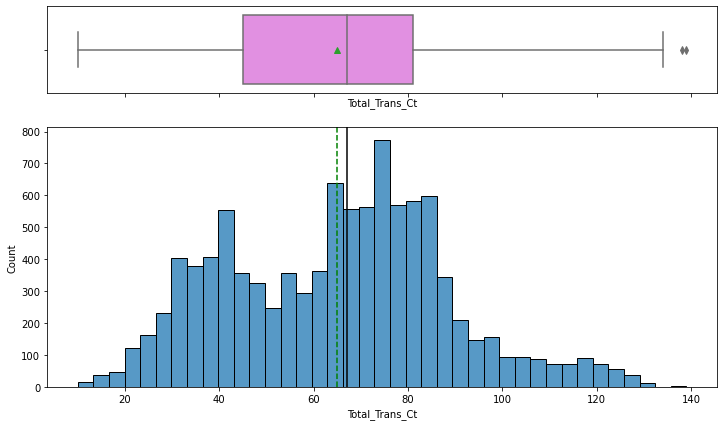

In [94]:
histogram_boxplot(df, 'Total_Trans_Ct')

In [95]:
print("Column: Total_Trans_Ct has skewness ",df['Total_Trans_Ct'].skew())

Column: Total_Trans_Ct has skewness  0.15367306849872275


In [96]:
#Checking quartiles for outliers
outlier_ID(df,'Total_Trans_Ct',2)

The quartiles for Total_Trans_Ct are the following: Q1 = 45.0, Q3 = 81.0, 2*IQR = 72.0


Series([], Name: Total_Trans_Ct, dtype: int64)

In [97]:
#counting number of null values
df['Total_Trans_Ct'].isna().sum()

0

Observations:

* Not skewed
* Two peaks - perhaps iteracting with another factor
* No major outliers or missing data

### Observations on Total_Ct_Chng_Q4_Q1

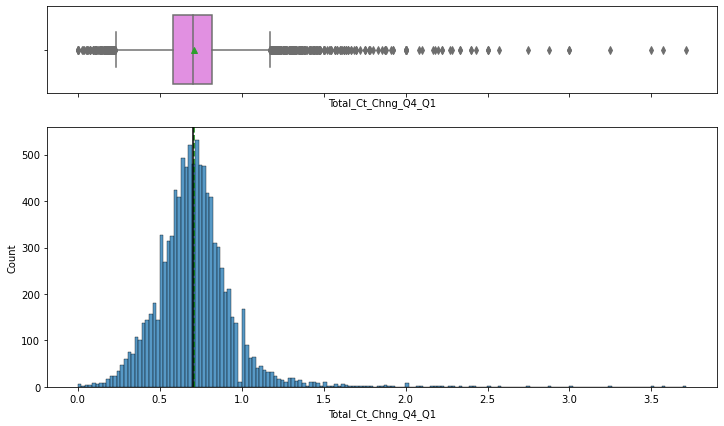

In [98]:
histogram_boxplot(df, 'Total_Ct_Chng_Q4_Q1')

In [99]:
print("Column: Total_Ct_Chng_Q4_Q1 has skewness ",df['Total_Ct_Chng_Q4_Q1'].skew())

Column: Total_Ct_Chng_Q4_Q1 has skewness  2.0640305679077477


In [100]:
#Checking quartiles for outliers
outlier_ID(df,'Total_Ct_Chng_Q4_Q1',2)

The quartiles for Total_Ct_Chng_Q4_Q1 are the following: Q1 = 0.582, Q3 = 0.818, 2*IQR = 0.472


1       3.714
773     3.571
269     3.500
12      3.250
113     3.000
        ...  
3596    0.000
1905    0.000
4417    0.000
4701    0.000
7207    0.000
Name: Total_Ct_Chng_Q4_Q1, Length: 389, dtype: float64

In [101]:
#counting number of null values
df['Total_Ct_Chng_Q4_Q1'].isna().sum()

0

Observations:

* Almost identical to transaction amount ratio. Probably can drop one.
* Will sqrt to reduce outliers

In [102]:
df['Total_Ct_Chng_Q4_Q1'] = np.sqrt(df['Total_Ct_Chng_Q4_Q1'])

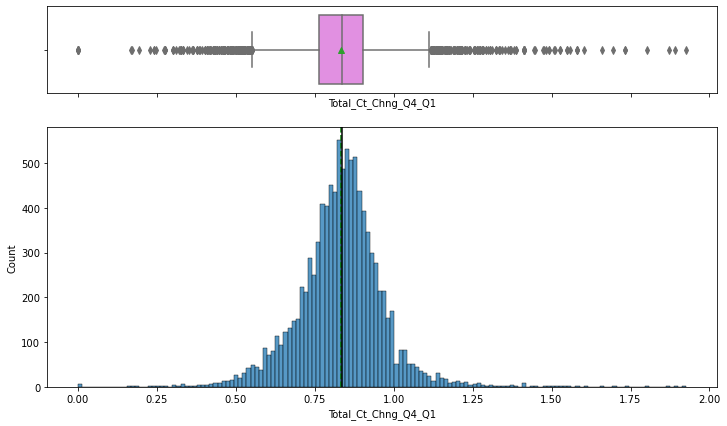

In [103]:
histogram_boxplot(df, 'Total_Ct_Chng_Q4_Q1')

In [104]:
print("Column: Total_Ct_Chng_Q4_Q1 has skewness ",df['Total_Ct_Chng_Q4_Q1'].skew())

Column: Total_Ct_Chng_Q4_Q1 has skewness  0.22468602138625562


Similar to amount change, this reduced skew but many outliers remain. Worth it for the skew reduction.

Remaining outliers won't be treated because they represent real trends.

### Observations on Avg_Utilization_Ratio

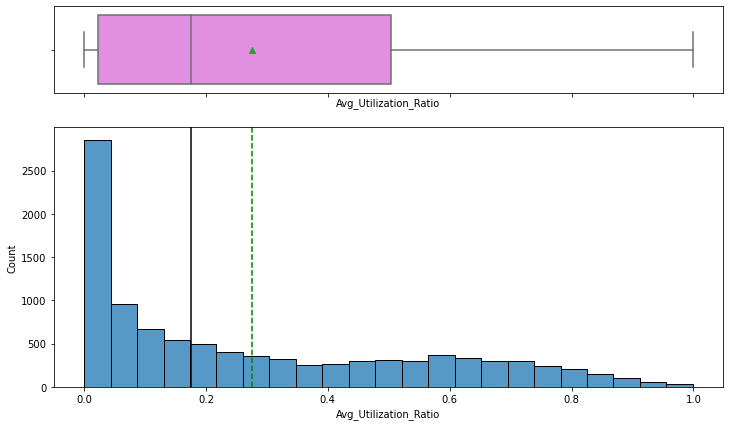

In [105]:
histogram_boxplot(df, 'Avg_Utilization_Ratio')

In [106]:
print("Column: Avg_Utilization_Ratio has skewness ",df['Avg_Utilization_Ratio'].skew())

Column: Avg_Utilization_Ratio has skewness  0.7180079967731994


In [107]:
#Checking quartiles for outliers
outlier_ID(df,'Avg_Utilization_Ratio',2)

The quartiles for Avg_Utilization_Ratio are the following: Q1 = 0.023, Q3 = 0.503, 2*IQR = 0.96


Series([], Name: Avg_Utilization_Ratio, dtype: float64)

In [108]:
#counting number of null values
df['Avg_Utilization_Ratio'].isna().sum()

0

Observations:
* No outliers or weird numbers
* Seems like this is measuring exactly the same thing has Avg_Open_To_Buy
* Skewed but not extremely so. I definitely wouldn't call this a normal distribution.

## Bivariate Analysis

Let's start off with a correlation matrix. If anything is correlated strongly, it implies we can drop one of the columns. No sense doing other analyses if we're just going to drop it.

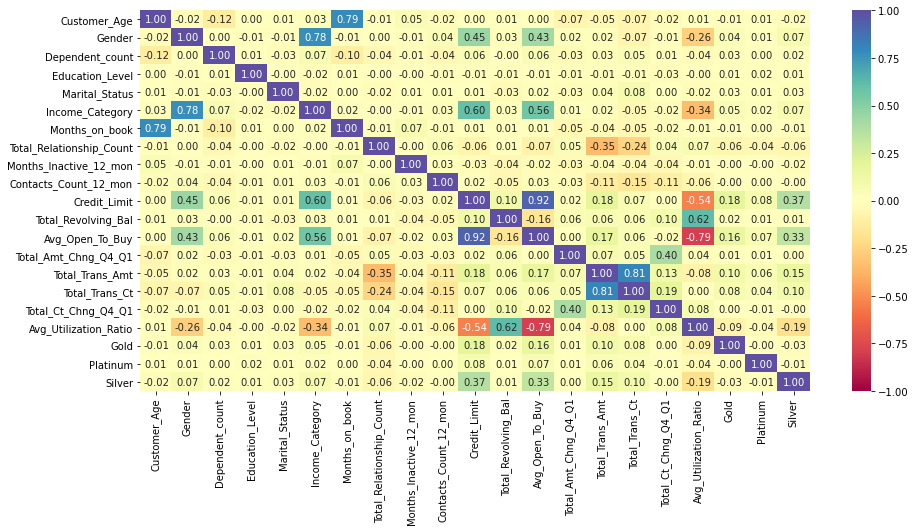

In [109]:
#Making a correlation heat plot
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

We see the following have very strong correlations:

* Months_on_book and Customer_Age
* Total_Trans_Amt and Total_Trans_Ct
* Avg_Open_To_Buy and Credit_Limit
* Avg_Open_To_Buy and Avg_Utilization_Ratio

Then these are moderately correlated:

* Credit_Limit and Avg_Utilization_Ratio
* Total_Revolving_Bal and Avg_Utilization_Ratio
* Total_Amt_Chng_A4_Q1 and Total_Ct_Chng_Q4_Q1

We see some weak correlations with:

* Total_Relationship_Count and Total_Trans_Amt


So, as I expected, it seems like the features measuring amount and the features measuring counts are correlated. This means we can probably drop some of them.

Avg_Utilization_Ratio is an interesting case because it both negatively correlates with some features and has a positive correlation with another, but the positive correlate (Total_Revolving_Bal) has no relationship with the two negative correlations. Theoretically, a strong correlation should show similar relationships across the board, but it doesn't.

I am inclined to keep everything but the strong correlations. If we're having overfit problems I can perhaps drop the three features with a moderate correlation with Avg_Utilization_Ratio.

Of the strong correlations, I'm going to drop Months_on_book because if we're predicting for new customers I think Age will be more meaningful than how long they've been with the company.

I'll drop Credit_Limit, really it's a toss-up which one to drop there. They're measuring the same thing. I decided to keep Avg_Open_To_Buy because that's controlled by the customer, not the bank, so we can monitor it for red flags.

In [110]:
# Dropping all of the strong correlation pairs except two, which I will examine later
df.drop(['Months_on_book'],axis=1,inplace=True)
df.drop(['Credit_Limit'],axis=1,inplace=True)

In [111]:
# Cleaning up our numerical column list
to_remove = ['Months_on_book','Credit_Limit']
for i in to_remove:
    num_columns.remove(i)
num_columns

['Customer_Age',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

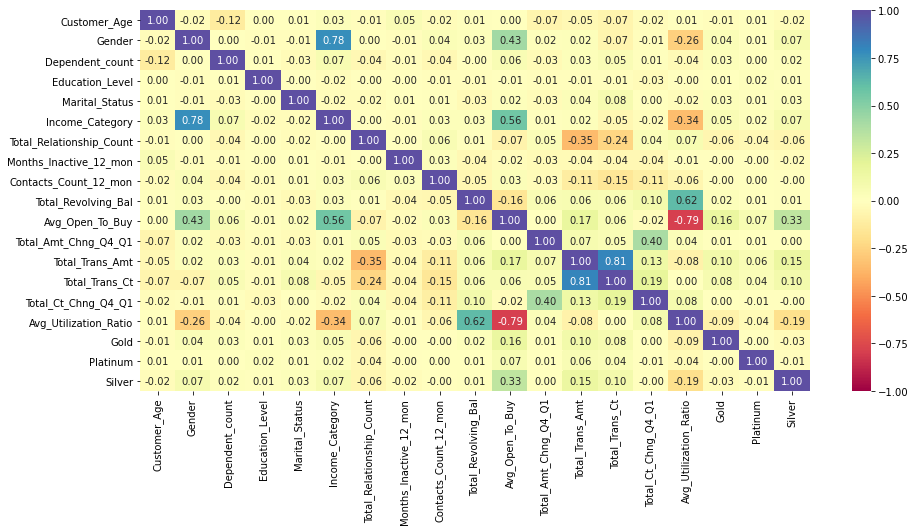

In [112]:
#Making a correlation heat plot
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

That looks a lot cleaner. I'll keep an eye on Avg_Utilization_Ratio.

### Interactions with target variable

### Attrition_Flag and Gender

Attrition_Flag     1     0    All
Gender                           
All             1627  8500  10127
0                930  4428   5358
1                697  4072   4769
------------------------------------------------------------------------------------------------------------------------


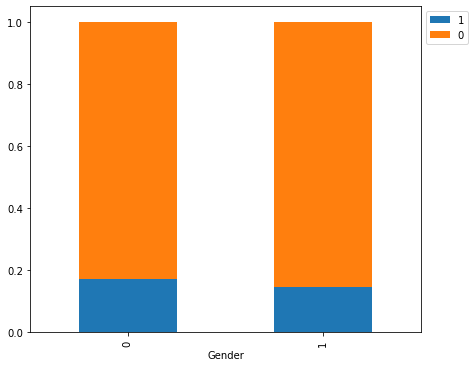

In [113]:
stacked_barplot(df, "Gender", "Attrition_Flag")

There doesn't seem to be a difference between the genders. Unlikely to make a difference. 

### Attrition_Flag and Dependent_count

Attrition_Flag      1     0    All
Dependent_count                   
All              1627  8500  10127
3                 482  2250   2732
2                 417  2238   2655
1                 269  1569   1838
4                 260  1314   1574
0                 135   769    904
5                  64   360    424
------------------------------------------------------------------------------------------------------------------------


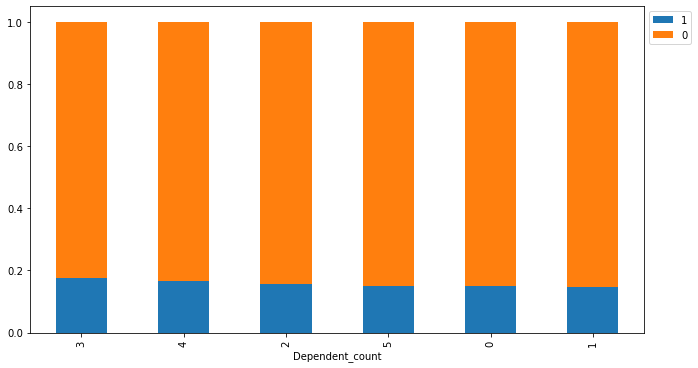

In [114]:
stacked_barplot(df, "Dependent_count", "Attrition_Flag")

Very weak relationship here if at all, I would not be surprised if this was due to random chance rather than an actual relationship. Plus, the relationship is not linear.

### Attrition_Flag and Education_Level

Attrition_Flag      1     0   All
Education_Level                  
All              1371  7237  8608
3.0               487  2641  3128
1.0               306  1707  2013
0.0               237  1250  1487
2.0               154   859  1013
5.0                95   356   451
4.0                92   424   516
------------------------------------------------------------------------------------------------------------------------


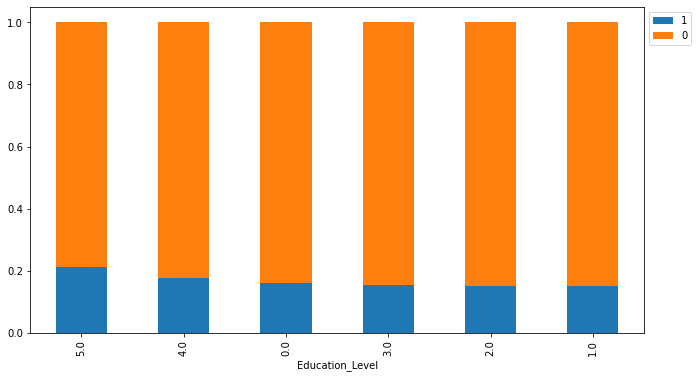

In [115]:
stacked_barplot(df, "Education_Level", "Attrition_Flag")

Doctorates and post-graduates seem ever slightly more likely churn. Otherwise, non-linear relationship if any.

### Attrition_Flag and Marital_Status

Attrition_Flag     1     0   All
Marital_Status                  
All             1498  7880  9378
1.0              709  3978  4687
2.0              668  3275  3943
0.0              121   627   748
------------------------------------------------------------------------------------------------------------------------


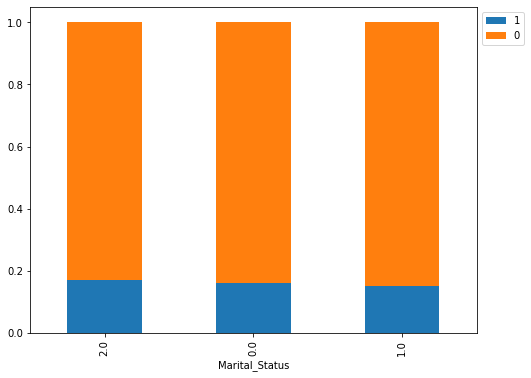

In [116]:
stacked_barplot(df, "Marital_Status", "Attrition_Flag")

Doesn't seem to have a strong relationship here. Singles are slightly more likely than married or divorced to churn. Weak relationship, if any.

Now that we're done with the bivariate relationship check, I'm going to dummy Marital Status, as it is not hierarchical.

In [117]:
df['Marital_Status'].isna().sum()

749

In [118]:
#Put the names back on so the dummy columns are named appropriately
df['Marital_Status'].replace(0,'Divorced',inplace=True)
df['Marital_Status'].replace(1,'Married',inplace=True)
df['Marital_Status'].replace(2,'Single',inplace=True)
#Make the dummies
Marital_dummies = pd.get_dummies(df['Marital_Status'],drop_first=True,dummy_na=True)
#Add them to the current df
df = pd.concat([df,Marital_dummies],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  int8    
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           8608 non-null   float64 
 5   Marital_Status            9378 non-null   object  
 6   Income_Category           9015 non-null   float64 
 7   Card_Category             10127 non-null  object  
 8   Total_Relationship_Count  10127 non-null  int64   
 9   Months_Inactive_12_mon    10127 non-null  int64   
 10  Contacts_Count_12_mon     10127 non-null  int64   
 11  Total_Revolving_Bal       10127 non-null  int64   
 12  Avg_Open_To_Buy           10127 non-null  float64 
 13  Total_Amt_Chng_Q4_Q1      10127 non-null  floa

In [119]:
#Name the nan column
df.rename(columns = {df.columns[23] : 'missing'},inplace=True)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  int8    
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           8608 non-null   float64 
 5   Marital_Status            9378 non-null   object  
 6   Income_Category           9015 non-null   float64 
 7   Card_Category             10127 non-null  object  
 8   Total_Relationship_Count  10127 non-null  int64   
 9   Months_Inactive_12_mon    10127 non-null  int64   
 10  Contacts_Count_12_mon     10127 non-null  int64   
 11  Total_Revolving_Bal       10127 non-null  int64   
 12  Avg_Open_To_Buy           10127 non-null  float64 
 13  Total_Amt_Chng_Q4_Q1      10127 non-null  floa

In [121]:
#We want to make sure we keep the nan when we dummy, so I'm wrapping nan back in to married/single
df.loc[df.missing == 1, ["Married", "Single"]] = np.nan
del df["missing"]
#Drop the original, we're done with it
df.drop(['Marital_Status'],axis=1,inplace=True)

In [122]:
#Checking to make sure it went smoothly
df['Married'].isna().sum()

749

In [123]:
# Updating cat_columns
newcols = ['Married','Single']

for i in newcols:
    cat_columns.append(i)
cat_columns.remove('Marital_Status')
cat_columns

['Attrition_Flag',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Income_Category',
 'Card_Category',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Gold',
 'Platinum',
 'Silver',
 'Married',
 'Single']

### Attrition_Flag and Total_Trans_Amt

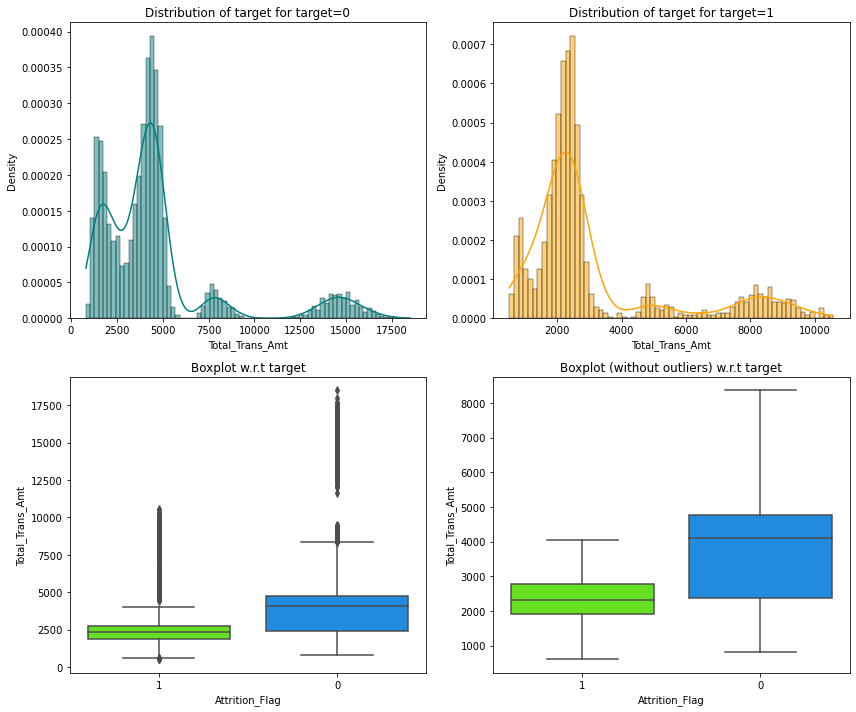

In [124]:
distribution_plot_wrt_target(df, "Total_Trans_Amt", "Attrition_Flag")

That's actually a pretty distinct effect. However, I can't help but notice that the last three bumps seem to be more proportional than the left-most one.

The effect is there but I don't think it's a continuous effect.

### Attrition_Flag and Income_Category

Attrition_Flag      1     0   All
Income_Category                  
All              1440  7575  9015
0.0               612  2949  3561
1.0               271  1519  1790
3.0               242  1293  1535
2.0               189  1213  1402
4.0               126   601   727
------------------------------------------------------------------------------------------------------------------------


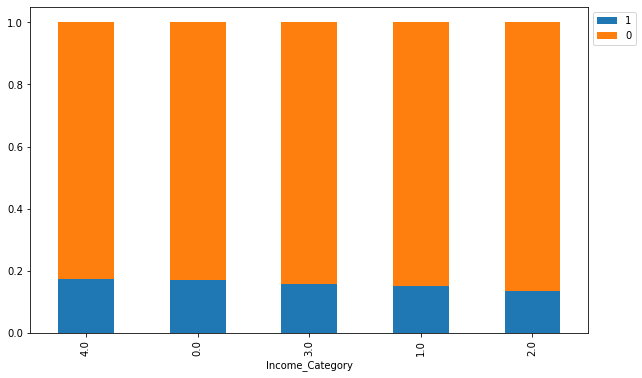

In [125]:
stacked_barplot(df, "Income_Category", "Attrition_Flag")

Not a strong relationship here, if any. Again, whatever trend there is isn't linear. People in the lowest income bracket are slightly more likely to churn, but the second most likely is the highest.

### Attrition_Flag and Card_Category

Attrition_Flag     1     0    All
Card_Category                    
All             1627  8500  10127
Blue            1519  7917   9436
Silver            82   473    555
Gold              21    95    116
Platinum           5    15     20
------------------------------------------------------------------------------------------------------------------------


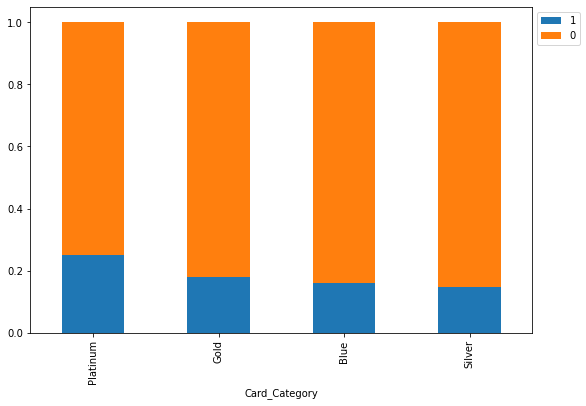

In [126]:
stacked_barplot(df, "Card_Category", "Attrition_Flag")

Platinum members are clearly more likely to churn than the other card types. This may be an important factor.

Now that we're done with the bivariate check, we can drop the original (we already made dummies).

In [127]:
df.drop(['Card_Category'],axis=1,inplace=True)

In [128]:
#Keeping cat_columns updated
cat_columns.remove('Card_Category')

### Attrition_Flag and Total_Relationship_Count

Attrition_Flag               1     0    All
Total_Relationship_Count                   
All                       1627  8500  10127
3                          400  1905   2305
2                          346   897   1243
1                          233   677    910
5                          227  1664   1891
4                          225  1687   1912
6                          196  1670   1866
------------------------------------------------------------------------------------------------------------------------


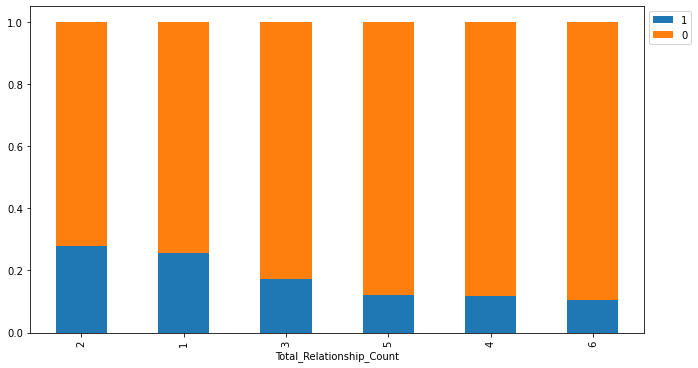

In [129]:
stacked_barplot(df, "Total_Relationship_Count", "Attrition_Flag")

Having 2 or 1 relationship with the bank has a much higher rate of churn than the others. The relationship is even slightly linear, as it tends to go down as the number of relationships go up. However, there is a big drop-off after 2. Thus we can say that any more than 1 or 2 relationships means the customer is less likely to churn.

### Attrition_Flag and Months_Inactive_12_mon

Attrition_Flag             1     0    All
Months_Inactive_12_mon                   
All                     1627  8500  10127
3                        826  3020   3846
2                        505  2777   3282
4                        130   305    435
1                        100  2133   2233
5                         32   146    178
6                         19   105    124
0                         15    14     29
------------------------------------------------------------------------------------------------------------------------


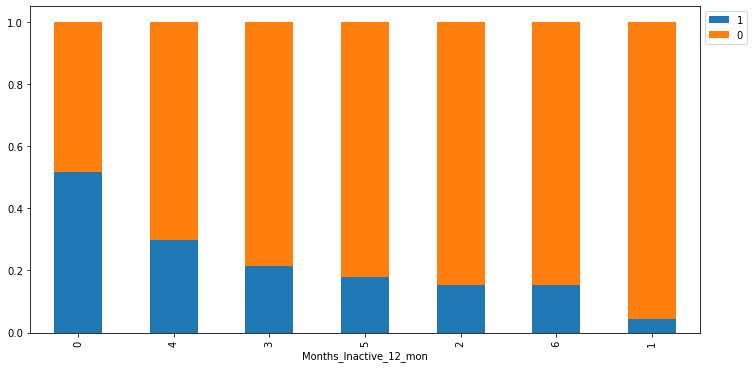

In [130]:
stacked_barplot(df, "Months_Inactive_12_mon", "Attrition_Flag")

Those are some huge differences that again are not linear.
No months inactive means they're very likely to churn. The other numbers are all over the place, with 1 having almost no churn and 4 having quite a lot.

This will be an impactful factor, but only in non-linear models.

### Attrition_Flag and Contacts_Count_12_mon

Attrition_Flag            1     0    All
Contacts_Count_12_mon                   
All                    1627  8500  10127
3                       681  2699   3380
2                       403  2824   3227
4                       315  1077   1392
1                       108  1391   1499
5                        59   117    176
6                        54     0     54
0                         7   392    399
------------------------------------------------------------------------------------------------------------------------


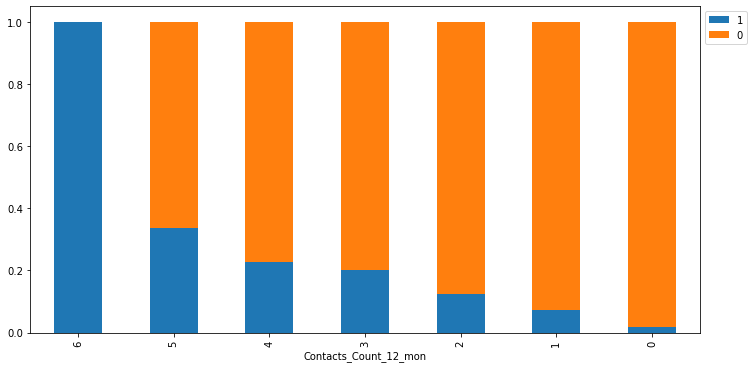

In [131]:
stacked_barplot(df, "Contacts_Count_12_mon", "Attrition_Flag")

Whoa! Look at that 6! Let's see if that's just like one guy

In [132]:
len(df[df['Contacts_Count_12_mon']==6])

54

In a sample of over 10,000 people, 54 is basically "one guy"

Still! That's a big deal. Not only that, but this is the first linear relationship I've seen. As Contact_Counts goes up, churn rate goes up. Very clear relationship, and I expect this to be a strong predictor.

### Attrition Flag and Customer_Age

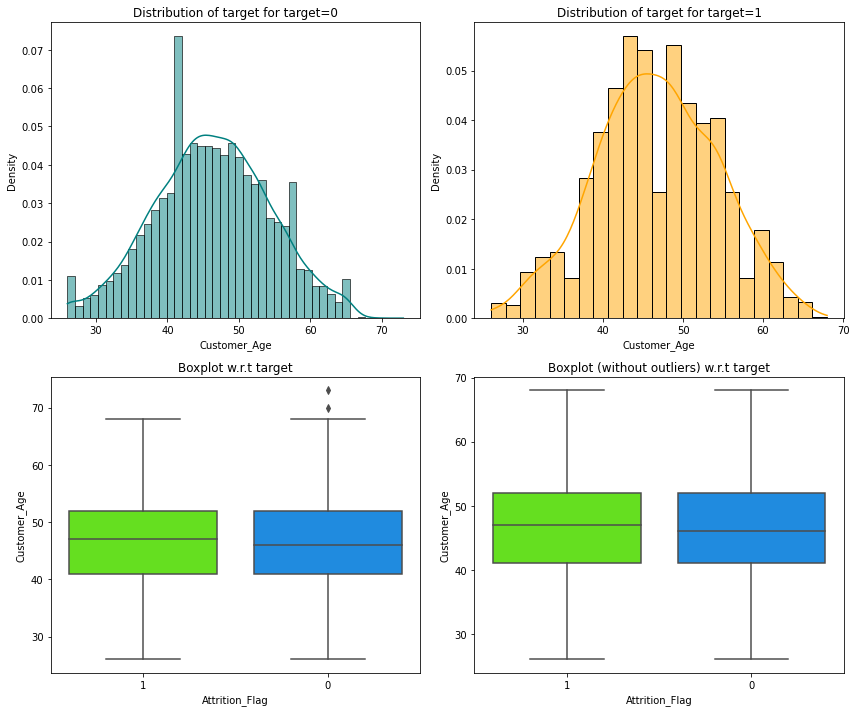

In [133]:
distribution_plot_wrt_target(df, "Customer_Age", "Attrition_Flag")

Almost identical whether they churned or not. No relationship or weak.

### Attrition Flag and Total_Revolving_Bal

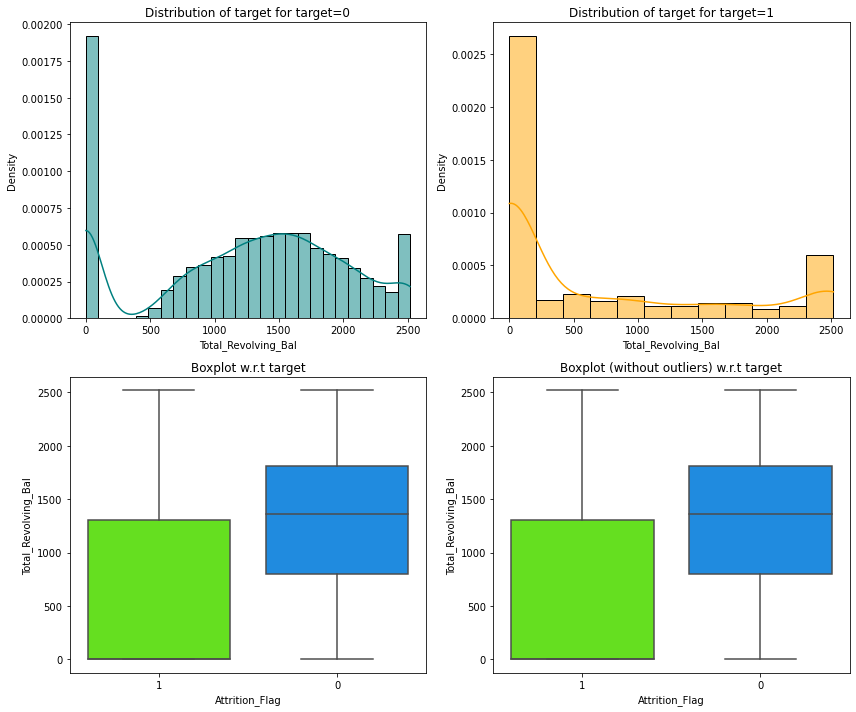

In [134]:
distribution_plot_wrt_target(df, "Total_Revolving_Bal", "Attrition_Flag")

Those who churned seem to have a lower total revolving balance. In fact, it seems like the zeroes are a big part of that. Let's look closer.

In [135]:
len(df[(df['Total_Revolving_Bal']==0)&(df['Attrition_Flag']==1)])/len(df[(df['Total_Revolving_Bal']==0)])

0.36153846153846153

36% of those who have 0 total revolving balance churned. This is substantially higher than the base rate of 16.1%. Having 0 more than doubles their chance of churning.

I'm going to separate out the non-zeroes and analyze them separately just to see if there are two relationships here.

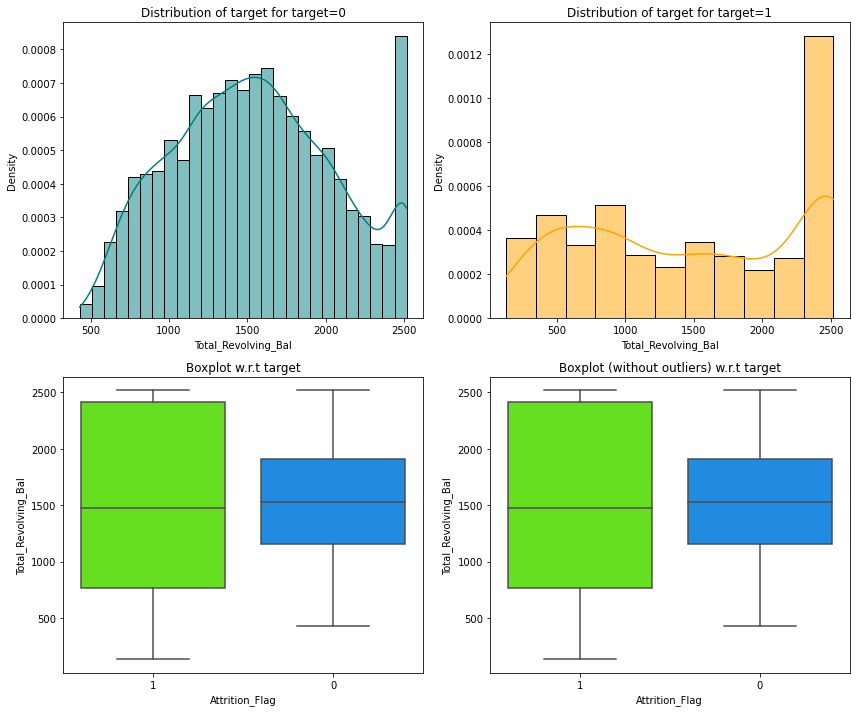

In [136]:
df_has_RB = pd.DataFrame(df[(df['Total_Revolving_Bal']!=0)])
distribution_plot_wrt_target(df_has_RB, "Total_Revolving_Bal", "Attrition_Flag")

It seems like the tail ends have a higher proportion than the middle, which is very difficult to account for.

In [137]:
len(df_has_RB[(df_has_RB['Total_Revolving_Bal']<600)&(df_has_RB['Attrition_Flag']==1)])/len(df_has_RB[(df_has_RB['Total_Revolving_Bal']<600)])

0.6218487394957983

In [138]:
df_has_RB[(df_has_RB['Total_Revolving_Bal']<600)]

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
40                 0            45       1                3              3.0   
186                0            49       1                3              4.0   
298                0            38       0                1              1.0   
343                1            58       1                1              0.0   
598                1            55       0                1              NaN   
...              ...           ...     ...              ...              ...   
9994               0            53       1                0              3.0   
10008              1            50       1                2              NaN   
10022              1            46       1                3              3.0   
10052              1            31       1                1              4.0   
10108              1            47       1                4              3.0   

       Income_Category  Total_Relationship_Count  Months_Inactive_12_mon  \
40                 3.0                         2                       2   
186                3.0                         3                       1   
298                0.0                         2                       3   
343                1.0                         2                       4   
598                0.0                         4                       1   
...                ...                       ...                     ...   
9994               2.0                         3                       1   
10008              4.0                         6                       2   
10022              2.0                         1                       2   
10052              1.0                         4                       2   
10108              3.0                         4                       3   

       Contacts_Count_12_mon  Total_Revolving_Bal  Avg_Open_To_Buy  \
40                         2                  578         4.503082   
186                        0                  462         3.764624   
298                        0                  583         2.932118   
343                        3                  537         2.954869   
598                        3                  361         3.032337   
...                      ...                  ...              ...   
9994                       3                  596         4.233631   
10008                      2                  492         4.192818   
10022                      4                  159         3.678609   
10052                      4                  534         3.560504   
10108                      4                  476         4.231164   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
40                 1.020784             1109              28   
186                1.077497             1087              33   
298                0.942338             1259              24   
343                0.904986              715              13   
598                0.981326              850              22   
...                     ...              ...             ...   
9994               0.833067            14409              83   
10008              0.451664             6100              61   
10022              0.769415             7412              60   
10052              0.914330             8565              70   
10108              0.944458            10468              66   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Gold  Platinum  Silver  \
40                0.688477                  0.018     0         0       0   
186               0.970052                  0.074     0         0       0   
298               1.000000                  0.405     0         0       0   
343               0.426615                  0.373     0         0       0   
598               0.831865                  0.251     0         0       0   
...                    ...                    ...   ...     

62% of those with fewer than 600 revolving bill churned. This percent only goes up as the amount gets smaller. On the other end:

In [139]:
len(df_has_RB[(df_has_RB['Total_Revolving_Bal']>2400)&(df_has_RB['Attrition_Flag']==1)])/len(df_has_RB[(df_has_RB['Total_Revolving_Bal']>2400)])

0.2702312138728324

27% of those that are above 2400 churned, still higher than 16.1%. It's a somewhat inverse bellcurve. 

In [140]:
len(df_has_RB[(df_has_RB['Total_Revolving_Bal']>600)&
              (df_has_RB['Total_Revolving_Bal']<2400)& 
              (df_has_RB['Attrition_Flag']==1)])/len(df_has_RB[(df_has_RB['Total_Revolving_Bal']>600)&
                                                               (df_has_RB['Total_Revolving_Bal']<2400)])

0.05934850513163766

Meanwhile, that huge swath of users between 600 and 2400 has a tiny 6% percent chance of churning.

If we can't get our target performance I'll return here and see about binning this variable.

### Attrition Flag and Avg_Open_To_Buy

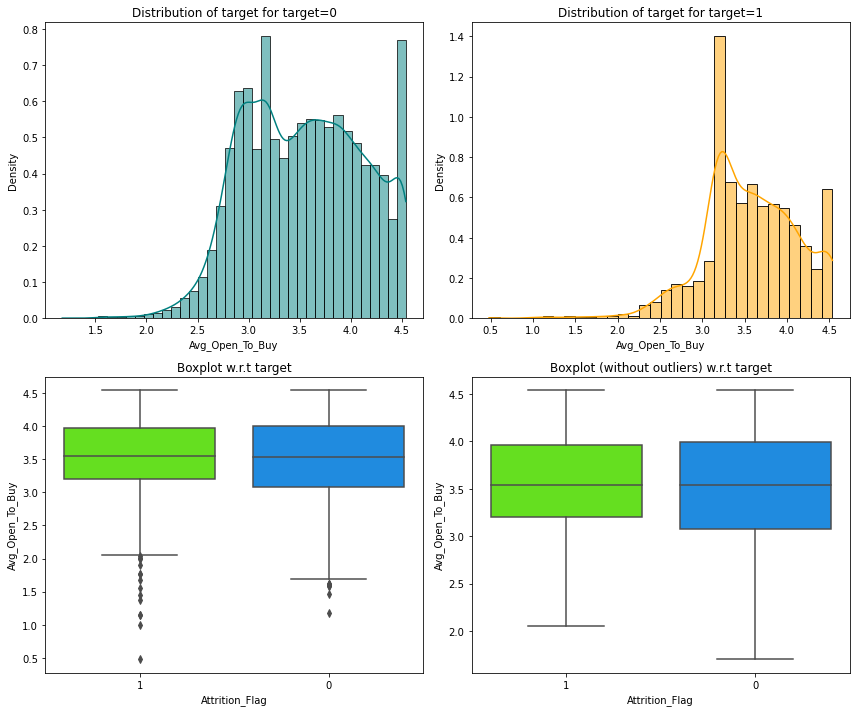

In [141]:
distribution_plot_wrt_target(df, "Avg_Open_To_Buy", "Attrition_Flag")

Seems identical whether they churned or not. Unimportant.

### Attrition Flag and Total_Amt_Chng_Q4_Q1

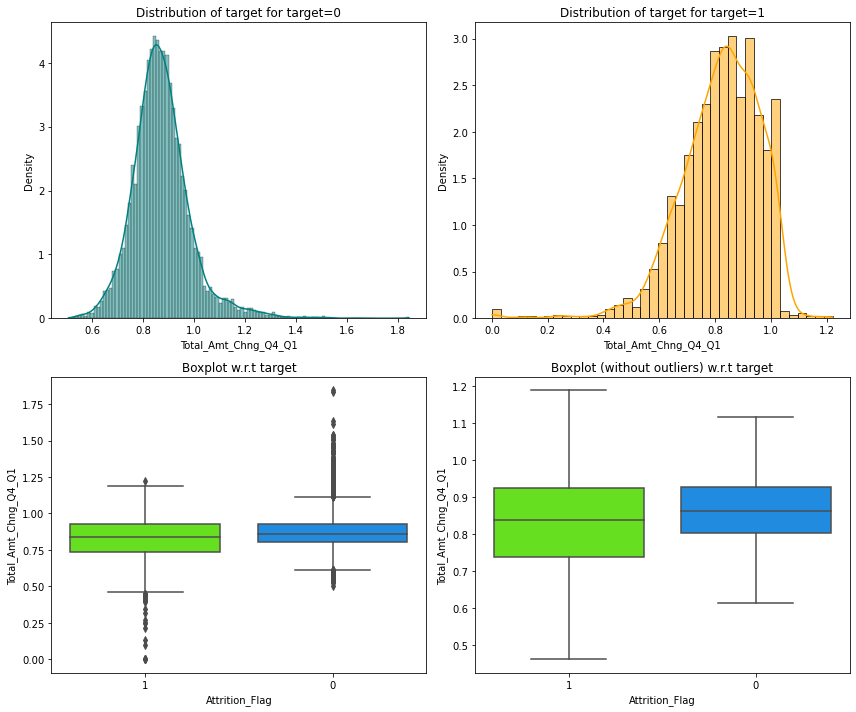

In [142]:
distribution_plot_wrt_target(df, "Total_Amt_Chng_Q4_Q1", "Attrition_Flag")

The graphs look different but that is because of the scaling of the X axis. The scale changed

This tells me that all of the outliers don't churn. Let's double check that.

In [143]:
df[(df['Total_Amt_Chng_Q4_Q1']>1.4) & (df['Attrition_Flag']==1)]

Empty DataFrame
Columns: [Attrition_Flag, Customer_Age, Gender, Dependent_count, Education_Level, Income_Category, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio, Gold, Platinum, Silver, Married, Single]
Index: []

OK, that's a pretty strong indicator that the really high outliers just don't churn. How many people is that, exactly?

In [144]:
len(df[(df['Total_Amt_Chng_Q4_Q1']>1.4)])

22

A tiny number, about 1% of the sample. I see a huge dropoff after about 1.1 though, let's see if that is more meaningful.

In [145]:
len(df[(df['Total_Amt_Chng_Q4_Q1']>1.1)])

339

339 is still a very small chunk of the total dataset. Given the otherwise fairly normal distribution here, I think I don't need to do any fancy slicing.

All that said, this feature is still largely unimportant. Weak relationship if any.

### Attrition Flag and Total_Trans_Ct

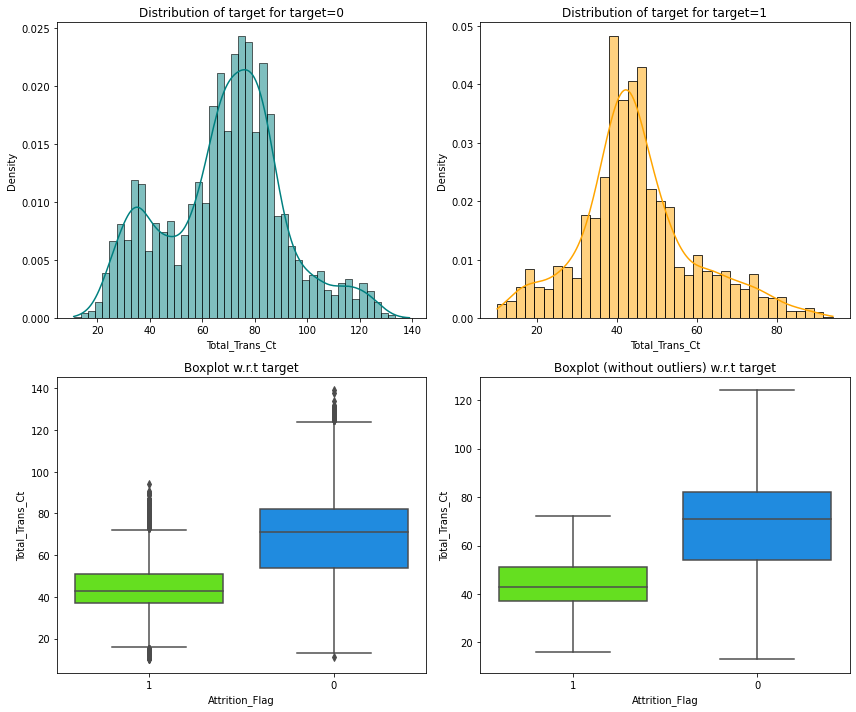

In [146]:
distribution_plot_wrt_target(df, "Total_Trans_Ct", "Attrition_Flag")

The curves look similar but the scaling on the x axis is widely different. This will actually be a good predictor of churn: those who use our products less are more likely to churn.

### Attrition Flag and Total_Ct_Chng_Q4_Q1

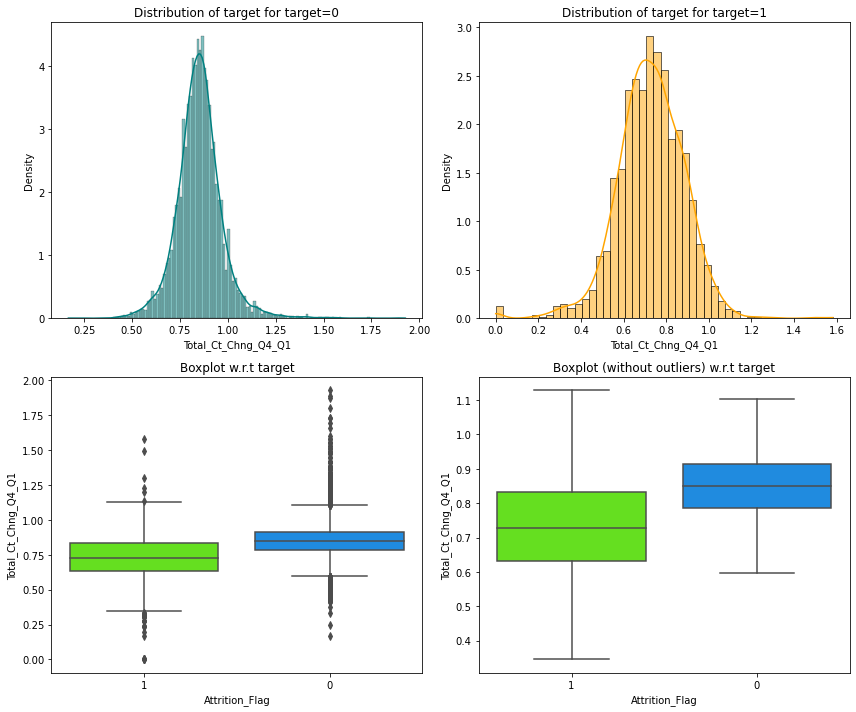

In [147]:
distribution_plot_wrt_target(df, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

These curves are almost identical. The mean is smaller for those that churn. Weak or moderate relationship.

### Attrition Flag and Avg_Utilization_Ratio

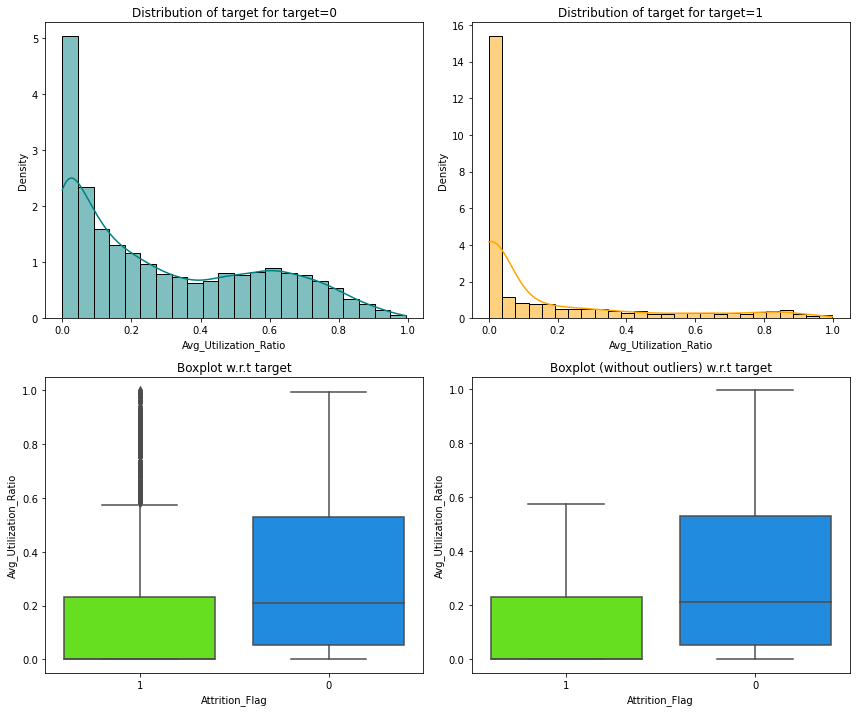

In [148]:
distribution_plot_wrt_target(df, "Avg_Utilization_Ratio", "Attrition_Flag")

This reminds me of Total_Revolving_Bal, which shouldn't surprise me because they had a moderate correlation. The Zeroes seem far more likely than everything else to churn. Let's look at it.

In [149]:
len(df[(df['Avg_Utilization_Ratio']==0)&(df['Attrition_Flag']==1)])/len(df[(df['Avg_Utilization_Ratio']==0)])

0.36153846153846153

The proportion of zeroes that churn is almost exactly the same as Total_Revolving_Bal.

I was on the fence about dropping this because of its correlations. Seeing how similar it is to Total_Revolving_Bal, I'm convinced that it's not worth it to keep it.

In [150]:
df.drop(['Avg_Utilization_Ratio'],axis=1,inplace=True)

### Pairplot of remaining columns

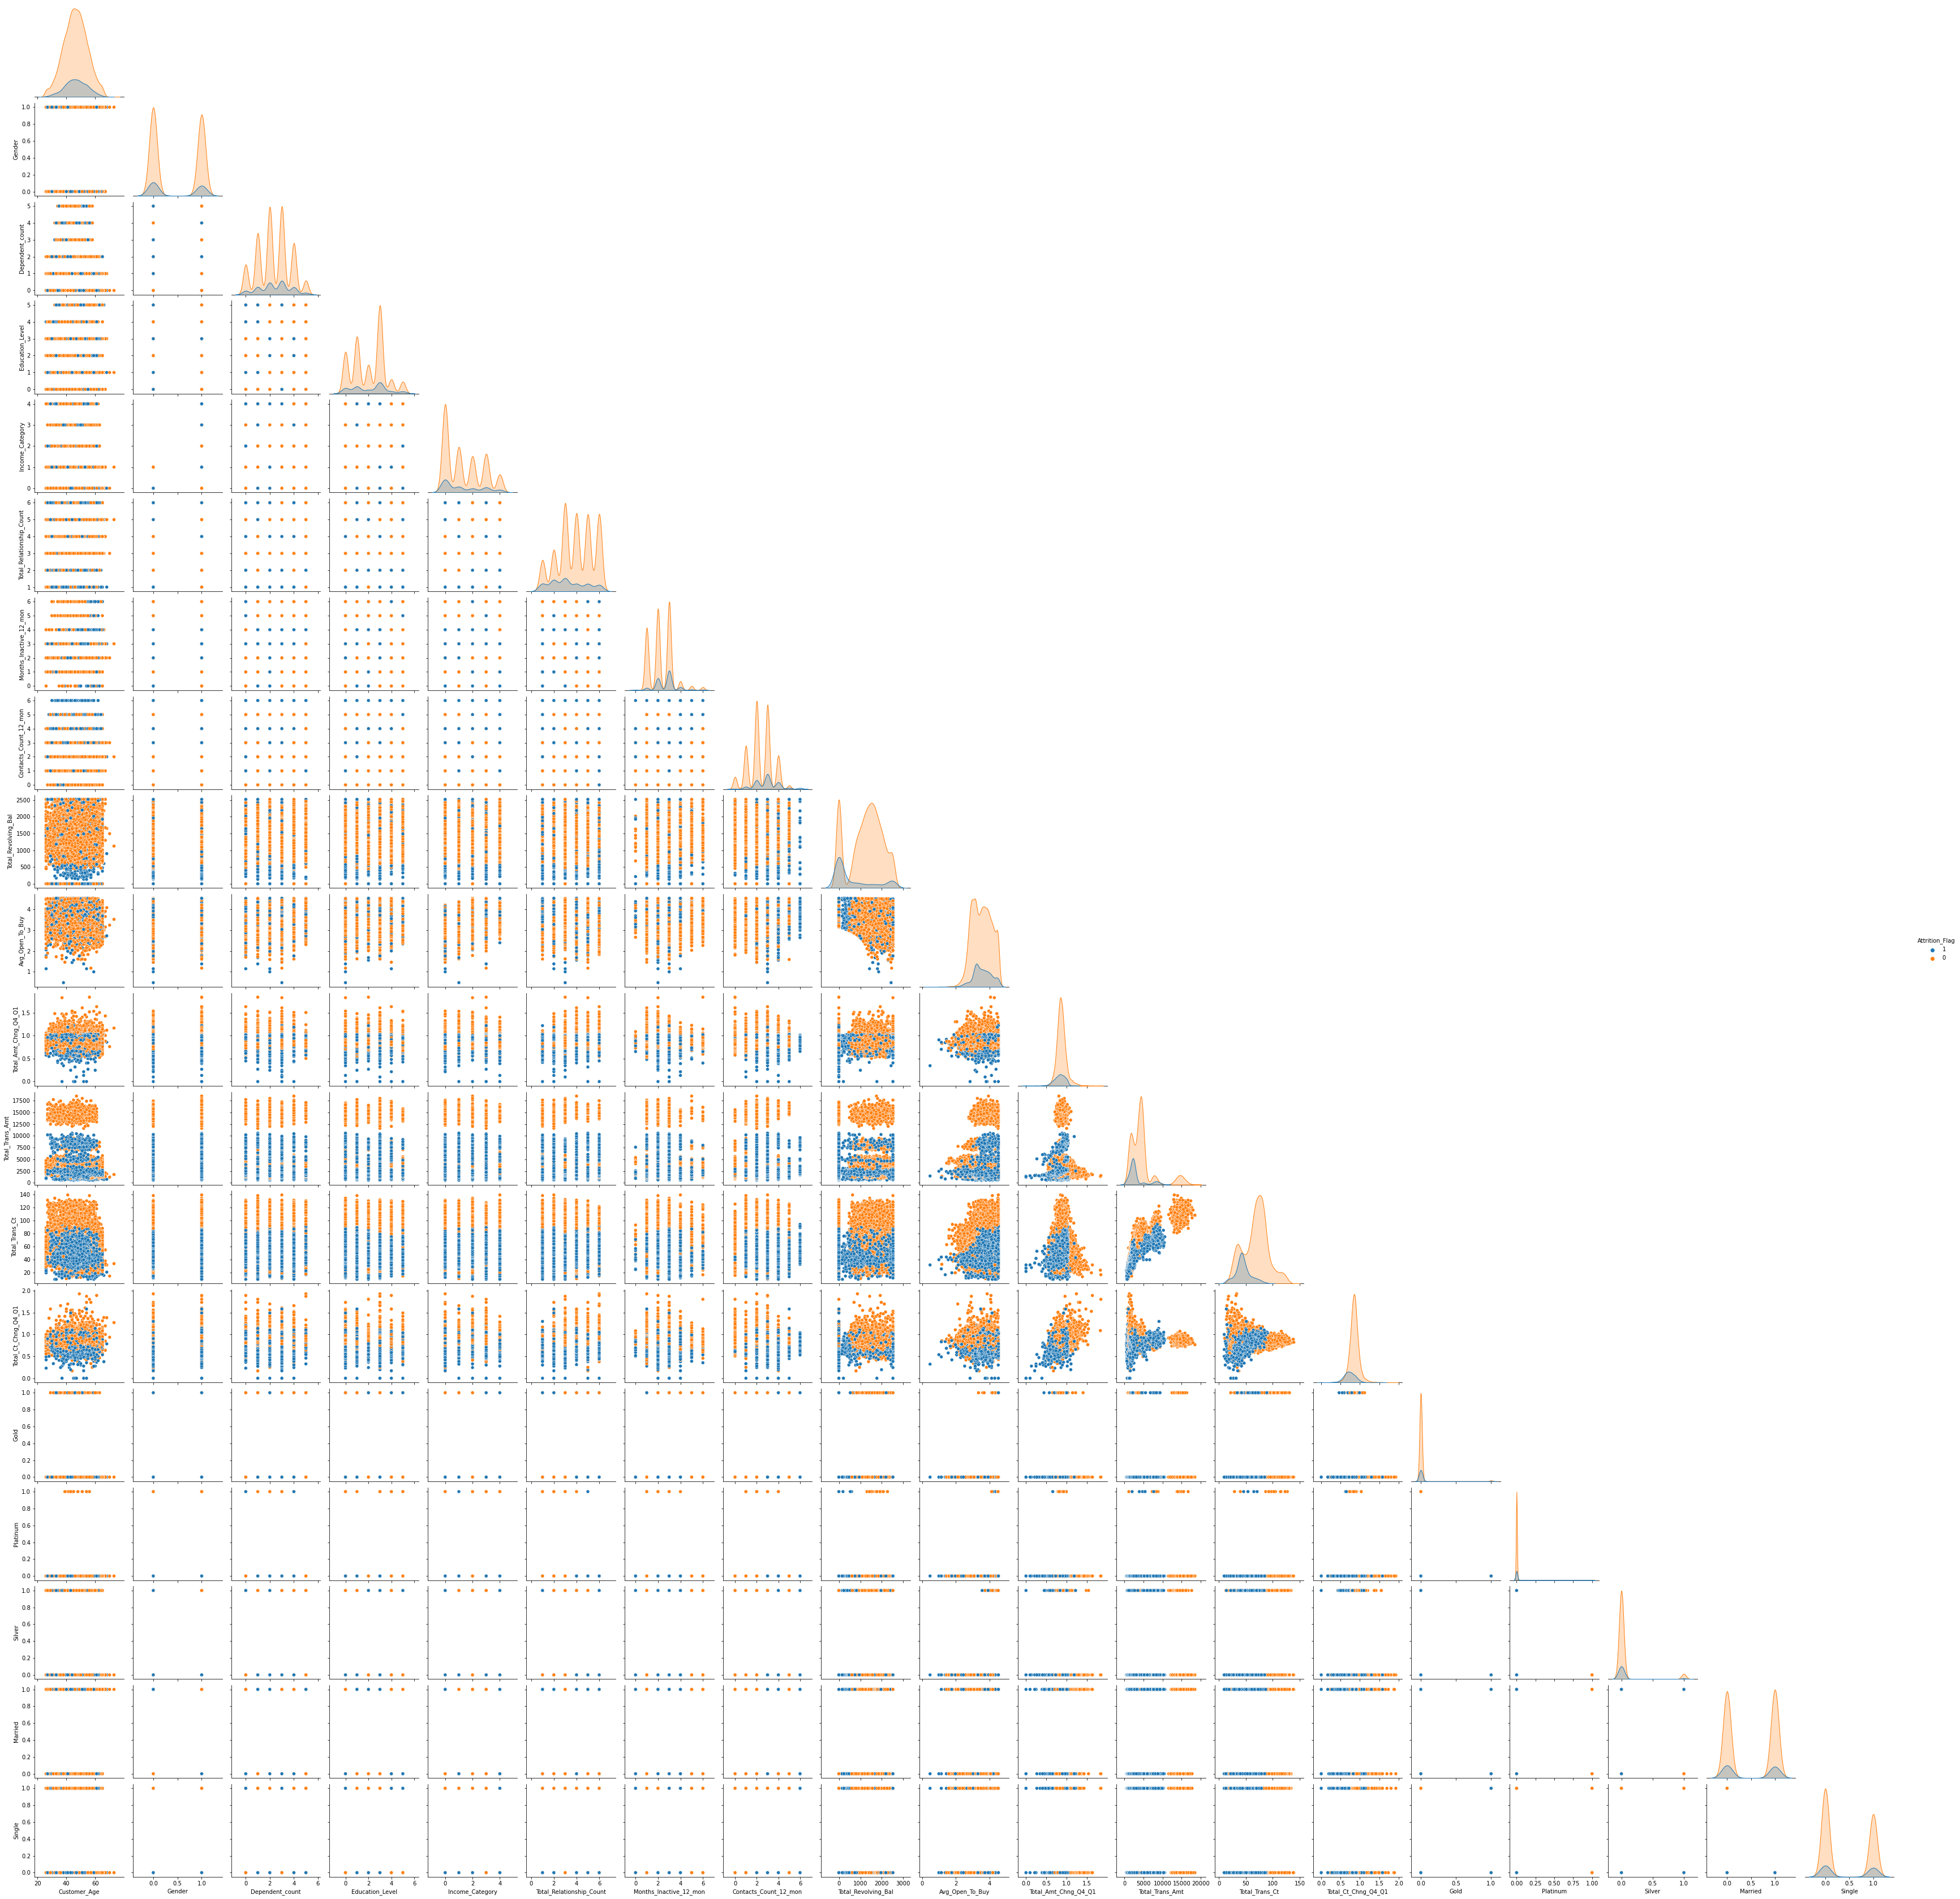

In [151]:
sns.pairplot(df, hue="Attrition_Flag",corner=True)

Interestingly, I see a few category interactions that seem to be able to predict the target variable quite nicely.

Here is some of what I spotted: 
* If the customer had high both Total_Amt_Chng_Q4_Q1 and Total_Ct_Chng_Q4_Q1 then almost none of them churned.
* If the customer had both low/mid Total_Trans_Ct and low Total_Ct_Chng_Q4_Q1 then they were far more likely to churn.
* If the customer has a gold card and a high education, they are much more likely to churn.
* If the customer does not have a platinum card and has 3 or higher Contacts_Count_12_mon then they are more likely to churn.
* Months_Inactive_12_mon and Education_Level had a linear relationship with churn: The closer these two terms are to one another, the more likely the customer is to churn.
* Avg_Open_To_Buy seems to have an interaction with Total_Trans_Ct, it becomes more of a line.


I may have missed some but these are the most obvious. If I add all of these interaction terms, we'll be looking at a large number of columns. I will see if our model is within performance expectations first before spending time creating/adding interaction terms.

## EDA Summary

Given the above EDA, here is what I am expecting from my models:

* gender - no difference
* dependents -no difference
* doctorate more likely to churn
* singles slightly more likely to churn
* Poorest slightly more likely to churn
* Platinum more likely to churn
* More than 1 or 2 relationships less likely to churn
* Months inactive: 0 months inactive far more likely to churn.
* As Contacts_Count_12_mon goes up, churn goes up. Strong relationship.
* age is unimportant
* Being on the tail ends of Revolving Balances is very important. Whether they're in the mid-range is a very strong predictor of not churning.
* Avg_Open_To_Buy is unimportant.
* Total_Amt_Chng_Q4_Q1 is unimportant
* Total_Trans_Ct - lower means more likely to churn

and as for the interactions:

* Total_Ct_Chng_Q4_Q1 lower more likely to churn, weak or moderate relationship.
* Gender:Edu: more educated men slightly more likely to churn.
* Inactive_mons:Edu significant interaction
* Age:Single:TRB_mid significant
* Age:Single:TRB0 significant
* TRB>2400:Education_Level helpful
* Platinum:Contacts_Count_12_mon very helpful
* Gold:Education_Level probably useless
* Total_Trans_Ct:Total_Ct_Chng_Q4_Q1 strong predictor
* Tlt_Amt:Tlt_Ct good predictor

If I had to make a profile of someone who is most likely to churn, I would say they are:

A poor single man with a doctorage, 1 or 2 relationships with us, lots of contacts in the past 12 months, and have a low revolving balance.

I'm not really sure how to interpret the interaction features. That's one of their disadvantages.

### Model choice

Now, among all of those relationships I saw a lot of non-linear relationships. This means I think non-parametric models will perform better. However, with the large number of columns at play here I think it worth it to try a logistic regression with a l1 penalty to try and reduce the number of features. Many of these have relationships so weak it's probably best to just drop them.

I also noticed a great deal of features where one specific value is very impactful. I think this lends itself well to simple decision trees. I think bagging methods will be useful because multiple short trees will have a lot of impact.

I've been tasked to make six models, for this I'm going to choose the following (no particular order):

1. Decision Tree
2. Random Forest
3. Bagging classifier
4. XGBoost
5. Logistic Regression (with l1 regularization)
6. Gradient Boost

Then I'll stack them

7. Stacking Classifier

# Model Building

## Approach:

1. Split the data into train - validation - test sets
2. Impute missing values
3. Train the six models on the base training data
4. Build the same models on oversampled training data
5. Build the same models on undersampled training data
6. Choose best 3 models and tune them
7. Compare performances

## Model Evaluation Criteria

### The Model can make wrong predictions as:
1. Predicting a customer will churn when they won't
2. Predicting a customer won't churn when they will

### Which case is more important?
1. If a customer won't churn and we think that they will, we lose the effort of trying to retain them.
2. If a customer will church and we don't catch it, we lose a valuable customer.

### Which metric to optimize?

It seems to me that we should try our best to minimize false negatives. Many of our strategies to retain customers will probably be encouraging them to use our products more, and that's a good thing even if we don't risk losing that customer.

That means we should try to maximize recall to ensure we catch as many people who are going to churn as possible.

## Splitting the Data

Before I do any sort of imputation or model training, I need to split the data to avoid data leakage.

In [152]:
# Separating target variable and other variables

X = df.drop(columns="Attrition_Flag")

Y = df["Attrition_Flag"]

# Splitting data into training, validation and test set:
# first we split data into 2 parts: temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=1, stratify=Y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape,X_temp.shape, y_temp.shape)

(6075, 19) (2026, 19) (2026, 19) (8101, 19) (8101,)


## Missing Value Treatment

I'm going to impute everything with Missing Forest as it can handle categorical variables well and has overall strong performance.

In [153]:
X_temp.isnull().sum().sort_values(ascending=True)

Customer_Age                   0
Silver                         0
Platinum                       0
Gold                           0
Total_Ct_Chng_Q4_Q1            0
Total_Trans_Ct                 0
Total_Trans_Amt                0
Total_Amt_Chng_Q4_Q1           0
Avg_Open_To_Buy                0
Contacts_Count_12_mon          0
Months_Inactive_12_mon         0
Total_Relationship_Count       0
Dependent_count                0
Gender                         0
Total_Revolving_Bal            0
Married                      597
Single                       597
Income_Category              875
Education_Level             1222
dtype: int64

In [154]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6075 entries, 800 to 4035
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              6075 non-null   int64  
 1   Gender                    6075 non-null   int8   
 2   Dependent_count           6075 non-null   int64  
 3   Education_Level           5147 non-null   float64
 4   Income_Category           5421 non-null   float64
 5   Total_Relationship_Count  6075 non-null   int64  
 6   Months_Inactive_12_mon    6075 non-null   int64  
 7   Contacts_Count_12_mon     6075 non-null   int64  
 8   Total_Revolving_Bal       6075 non-null   int64  
 9   Avg_Open_To_Buy           6075 non-null   float64
 10  Total_Amt_Chng_Q4_Q1      6075 non-null   float64
 11  Total_Trans_Amt           6075 non-null   int64  
 12  Total_Trans_Ct            6075 non-null   int64  
 13  Total_Ct_Chng_Q4_Q1       6075 non-null   float64
 14  Gold  

In [155]:
# I'll need column names as Missing Forest removes column names
col_names = dict(zip(np.arange(0, 36, 1),X_temp.columns))
col_names

{0: 'Customer_Age',
 1: 'Gender',
 2: 'Dependent_count',
 3: 'Education_Level',
 4: 'Income_Category',
 5: 'Total_Relationship_Count',
 6: 'Months_Inactive_12_mon',
 7: 'Contacts_Count_12_mon',
 8: 'Total_Revolving_Bal',
 9: 'Avg_Open_To_Buy',
 10: 'Total_Amt_Chng_Q4_Q1',
 11: 'Total_Trans_Amt',
 12: 'Total_Trans_Ct',
 13: 'Total_Ct_Chng_Q4_Q1',
 14: 'Gold',
 15: 'Platinum',
 16: 'Silver',
 17: 'Married',
 18: 'Single'}

In [156]:
#Imputing using MissForest
imputer = MissForest(random_state=1)
 #Preventing leakage by imputing each set separately
Xtr = X_train
X_train = pd.DataFrame(imputer.fit_transform(Xtr))

Xva = X_val
X_val = pd.DataFrame(imputer.fit_transform(Xva))

Xtemp = X_temp
X_temp = pd.DataFrame(imputer.fit_transform(Xtemp))

Xtest=X_test
X_test = pd.DataFrame(imputer.fit_transform(Xtest))

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


In [157]:
#Mapping all the names back on. Note there is no leakage as I'm just copying names.
X_train.columns = (np.arange(0, 19, 1))
X_train.columns = X_train.columns.map(col_names)

X_val.columns = (np.arange(0, 19, 1))
X_val.columns = X_val.columns.map(col_names)

X_test.columns = (np.arange(0, 19, 1))
X_test.columns = X_test.columns.map(col_names)

X_temp.columns = (np.arange(0,19,1))
X_temp.columns = X_temp.columns.map(col_names)

In [158]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6075 entries, 0 to 6074
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              6075 non-null   float64
 1   Gender                    6075 non-null   float64
 2   Dependent_count           6075 non-null   float64
 3   Education_Level           6075 non-null   float64
 4   Income_Category           6075 non-null   float64
 5   Total_Relationship_Count  6075 non-null   float64
 6   Months_Inactive_12_mon    6075 non-null   float64
 7   Contacts_Count_12_mon     6075 non-null   float64
 8   Total_Revolving_Bal       6075 non-null   float64
 9   Avg_Open_To_Buy           6075 non-null   float64
 10  Total_Amt_Chng_Q4_Q1      6075 non-null   float64
 11  Total_Trans_Amt           6075 non-null   float64
 12  Total_Trans_Ct            6075 non-null   float64
 13  Total_Ct_Chng_Q4_Q1       6075 non-null   float64
 14  Gold    

In [159]:
X_temp.shape

(8101, 19)

Looks good. Let's check out the columns we imputed.

We need to round those numbers. MissForest made it a float. We'll have to do that for the other categories that had NaNs too.

In [160]:
for column in cat_columns[1:]:
    X_train[column] = round(X_train[column])
    X_val[column] = round(X_val[column])
    X_temp[column] = round(X_temp[column])

In [161]:
X_train['Single'].value_counts()

0.0    3702
1.0    2373
Name: Single, dtype: int64

Looking good.

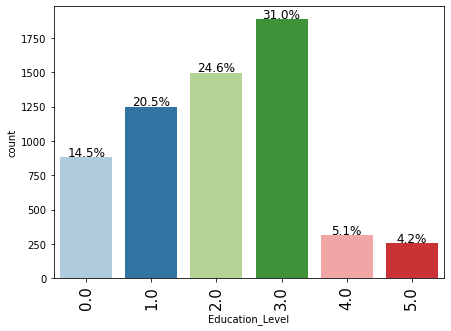

In [162]:
# Let's see how Education changed
labeled_barplot(X_train,'Education_Level',perc=True)

For Education, MissForest imputed a huge chunk of the missing values as college degrees, adding a large amount to that category. Honestly, I'm happy with this, as it seemed very odd that there were so few of those. This distribution looks quite nice.

### Oversampling and Undersampling

Our target variable is extremely unbalanced, and so under or over sampling may be warranted. I'm going to go ahead and create those datasets now.

In [163]:
#Creating an oversampled training set using SMOTE
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 976
Before UpSampling, counts of label 'No': 5099 

After UpSampling, counts of label 'Yes': 5099
After UpSampling, counts of label 'No': 5099 

After UpSampling, the shape of train_X: (10198, 19)
After UpSampling, the shape of train_y: (10198,) 



In [164]:
#Creating undersampled using RandomUndersampler
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 19)
After Under Sampling, the shape of train_y: (1952,) 



In [165]:
#We need to turn these into dataframes to prevent errors with XGBoost
X_train_over = pd.DataFrame(X_train_over)
X_train_over.columns = ['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Income_Category', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Gold', 'Platinum', 'Silver', 'Married',
       'Single']

X_train_un = pd.DataFrame(X_train_un)
X_train_un.columns = ['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Income_Category', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Gold', 'Platinum', 'Silver', 'Married',
       'Single']

In [166]:
X_train_over.columns

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Income_Category', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Gold', 'Platinum', 'Silver', 'Married',
       'Single'],
      dtype='object')

In [167]:
#Now to round the cat columns again for both
for column in cat_columns[1:]:
    X_train_over[column] = round(X_train_over[column])
    X_train_un[column] = round(X_train_un[column])

In [168]:
col_names

{0: 'Customer_Age',
 1: 'Gender',
 2: 'Dependent_count',
 3: 'Education_Level',
 4: 'Income_Category',
 5: 'Total_Relationship_Count',
 6: 'Months_Inactive_12_mon',
 7: 'Contacts_Count_12_mon',
 8: 'Total_Revolving_Bal',
 9: 'Avg_Open_To_Buy',
 10: 'Total_Amt_Chng_Q4_Q1',
 11: 'Total_Trans_Amt',
 12: 'Total_Trans_Ct',
 13: 'Total_Ct_Chng_Q4_Q1',
 14: 'Gold',
 15: 'Platinum',
 16: 'Silver',
 17: 'Married',
 18: 'Single'}

In [169]:
#Sanity check to ensure everything rounded properly
X_train_over['Silver'].value_counts()

0.0    9638
1.0     560
Name: Silver, dtype: int64

## Assessment Functions

Before I make any models, I have to import some functions so I can assess their performance.

In [170]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [171]:
#Making a function for displaying confusion matrices with percentages and such
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# The Six Models
I'm going to build my six models and then see how they perform on the training/validation sets. Then I'll stack them!

For each model, the first set of scores is the training score, and the second set of scores is the validation score.

## Gradient Boosting Classifier

### Base Training Data

Training performance:
    Accuracy    Recall  Precision       F1
0  0.973498  0.876025   0.955307  0.91395
Testing performance:
    Accuracy    Recall  Precision     F1
0  0.967917  0.858896   0.936455  0.896


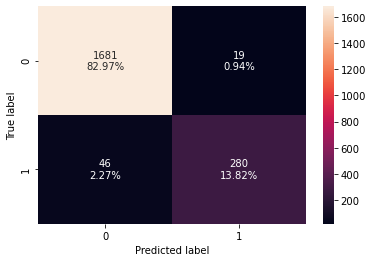

In [172]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_val,y_val)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_val,y_val)

Very strong results, especially with precision, but recall is not within our performance goals.

### Oversampled Data

Training performance:
    Accuracy    Recall  Precision        F1
0  0.971367  0.980192   0.963191  0.971617
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.954097  0.941718   0.805774  0.868458


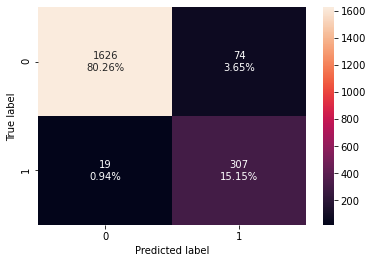

In [173]:
#Fitting the model
gb_over_classifier = GradientBoostingClassifier(random_state=1)
gb_over_classifier.fit(X_train_over,y_train_over)

#Calculating different metrics
gb_over_classifier_model_train_perf=model_performance_classification_sklearn(gb_over_classifier,X_train_over,y_train_over)
print("Training performance:\n",gb_over_classifier_model_train_perf)
gb_over_classifier_model_test_perf=model_performance_classification_sklearn(gb_over_classifier,X_val,y_val)
print("Testing performance:\n",gb_over_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_over_classifier,X_val,y_val)

Another excellent showing, though it does not have quite high enough recall. I'll have to tune this one.

### Undersampled Data

Training performance:
    Accuracy    Recall  Precision        F1
0  0.974898  0.981557   0.968655  0.975064
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.935341  0.96319   0.725173  0.827404


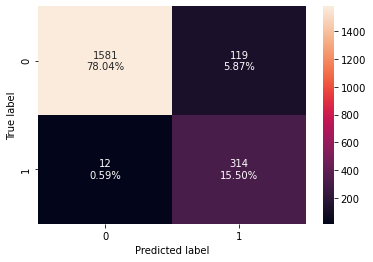

In [174]:
#Fitting the model
gb_un_classifier = GradientBoostingClassifier(random_state=1)
gb_un_classifier.fit(X_train_un,y_train_un)

#Calculating different metrics
gb_un_classifier_model_train_perf=model_performance_classification_sklearn(gb_un_classifier,X_train_un,y_train_un)
print("Training performance:\n",gb_un_classifier_model_train_perf)
gb_un_classifier_model_test_perf=model_performance_classification_sklearn(gb_un_classifier,X_val,y_val)
print("Testing performance:\n",gb_un_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_un_classifier,X_val,y_val)

That's a very good recall and precision, and well within our performance goals. It is overfitting a little bit, but not too bad.

## Bagging Classifier

### Base Training Data

   Accuracy    Recall  Precision        F1
0  0.996543  0.981557   0.996878  0.989158
   Accuracy    Recall  Precision        F1
0  0.953603  0.812883   0.889262  0.849359


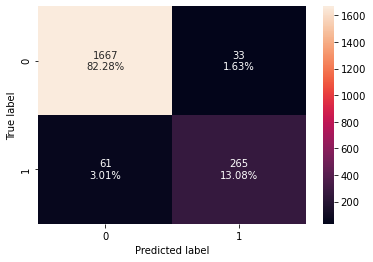

In [175]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print(bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_val,y_val)
print(bagging_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier,X_val,y_val)

Really good training performance but a severe drop in recall on the validation set. Although the overall performance is pretty good, our goal is to maximize recall, so this is not great. It's overfitting.

### Oversampled data

   Accuracy    Recall  Precision        F1
0  0.998725  0.999216   0.998237  0.998726
   Accuracy    Recall  Precision        F1
0   0.94768  0.889571   0.805556  0.845481


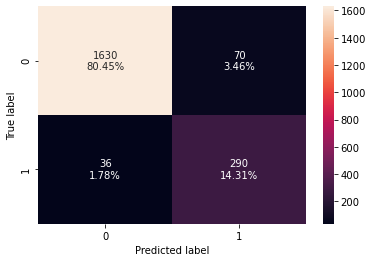

In [176]:
#Fitting the model
bagging_classifier_over = BaggingClassifier(random_state=1)
bagging_classifier_over.fit(X_train_over,y_train_over)

#Calculating different metrics
bagging_classifier_over_model_train_perf=model_performance_classification_sklearn(bagging_classifier_over,X_train_over,y_train_over)
print(bagging_classifier_over_model_train_perf)
bagging_classifier_over_model_test_perf=model_performance_classification_sklearn(bagging_classifier_over,X_val,y_val)
print(bagging_classifier_over_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier_over,X_val,y_val)

Compared to baseline, the oversampled model performed better

### Undersampled Data

   Accuracy    Recall  Precision        F1
0  0.995902  0.993852   0.997942  0.995893
   Accuracy    Recall  Precision        F1
0  0.925962  0.932515   0.703704  0.802111


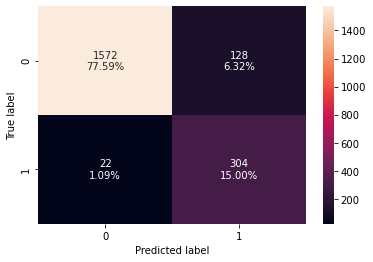

In [177]:
#Fitting the model
bagging_classifier_un = BaggingClassifier(random_state=1)
bagging_classifier_un.fit(X_train_un,y_train_un)

#Calculating different metrics
bagging_classifier_un_model_train_perf=model_performance_classification_sklearn(bagging_classifier_un,X_train_un,y_train_un)
print(bagging_classifier_un_model_train_perf)
bagging_classifier_un_model_test_perf=model_performance_classification_sklearn(bagging_classifier_un,X_val,y_val)
print(bagging_classifier_un_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier_un,X_val,y_val)

For bagging, the undersampled training data is the clear winner, with a much higher recall than base or oversampled.

## XGBoost Classifier

### Base training Data

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Validation performance:
    Accuracy   Recall  Precision        F1
0  0.971372  0.90184    0.91875  0.910217


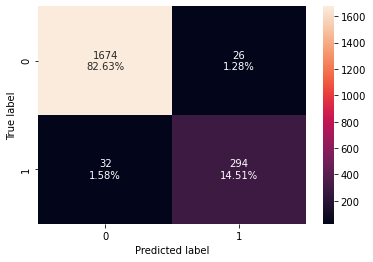

In [178]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_val,y_val)
print("Validation performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_val,y_val)

Not a lot of overfit, which is good, but performance is not quite where I want it to be.

### Oversampled Data

Training performance:
    Accuracy  Recall  Precision        F1
0  0.999902     1.0   0.999804  0.999902
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.965943  0.917178   0.876833  0.896552


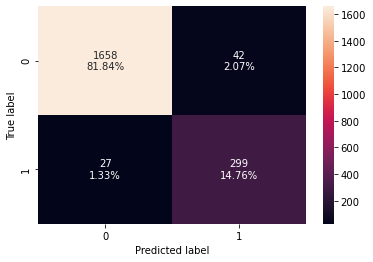

In [179]:
#Fitting the model
xgb_classifier_over = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier_over.fit(X_train_over,y_train_over)

#Calculating different metrics
xgb_classifier_over_model_train_perf=model_performance_classification_sklearn(xgb_classifier_over,X_train_over,y_train_over)
print("Training performance:\n",xgb_classifier_over_model_train_perf)
xgb_classifier_over_model_test_perf=model_performance_classification_sklearn(xgb_classifier_over, X_val, y_val)
print("Validation performance:\n",xgb_classifier_over_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier_over,X_val,y_val)

Very strong model but the recall just falls short of our performance target.

### Undersampled Data

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.937808  0.956923   0.735225  0.831551


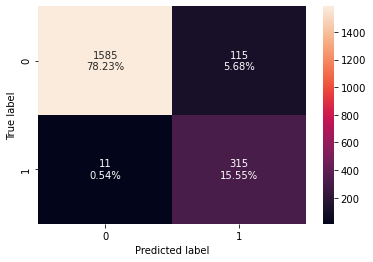

In [180]:
#Fitting the model
xgb_classifier_un = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier_un.fit(X_train_un,y_train_un)

#Calculating different metrics
xgb_classifier_un_model_train_perf=model_performance_classification_sklearn(xgb_classifier_un,X_train_un,y_train_un)
print("Training performance:\n",xgb_classifier_un_model_train_perf)
xgb_classifier_un_model_test_perf=model_performance_classification_sklearn(xgb_classifier_un, X_test, y_test)
print("Validation performance:\n",xgb_classifier_un_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier_un,X_val,y_val)

Performance is far better than oversampled and baseline, and falls within our performance target of high recall while maintaining acceptable accuracy.

## Random Forest Classifier

### Base Training Data

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.963968  0.834356   0.934708  0.881686


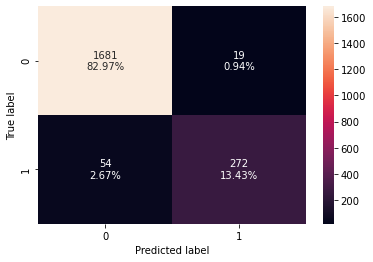

In [181]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_val,y_val)
print("Validation performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator,X_val,y_val)

Very overfit and not a very good recall.

### Oversampled Data

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.959033  0.895706   0.856305  0.875562


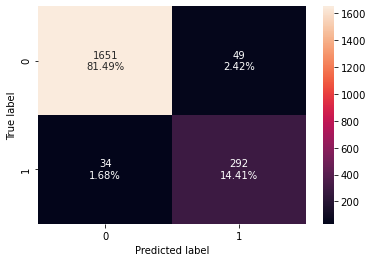

In [182]:
#Fitting the model
rf_estimator_over = RandomForestClassifier(random_state=1)
rf_estimator_over.fit(X_train_over,y_train_over)

#Calculating different metrics
rf_estimator_over_model_train_perf=model_performance_classification_sklearn(rf_estimator_over,X_train_over,y_train_over)
print("Training performance:\n",rf_estimator_over_model_train_perf)
rf_estimator_over_model_test_perf=model_performance_classification_sklearn(rf_estimator_over,X_val,y_val)
print("Validation performance:\n",rf_estimator_over_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator_over,X_val,y_val)


Increase in Recall but still not good enough. Also still overfitting.

### Undersampled Data

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.937315  0.966154   0.730233  0.831788


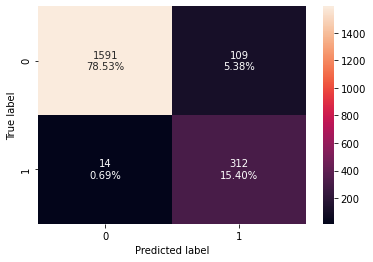

In [183]:
#Fitting the model
rf_estimator_un = RandomForestClassifier(random_state=1)
rf_estimator_un.fit(X_train_un,y_train_un)

#Calculating different metrics
rf_estimator_un_model_train_perf=model_performance_classification_sklearn(rf_estimator_un,X_train_un,y_train_un)
print("Training performance:\n",rf_estimator_un_model_train_perf)
rf_estimator_un_model_test_perf=model_performance_classification_sklearn(rf_estimator_un,X_test,y_test)
print("Validation performance:\n",rf_estimator_un_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator_un,X_val,y_val)

That's a marked increase in recall, but it's still overfitting quite a lot.

It meets our target performance goals but the overfit worries me.

## Decision Tree Classifier

### Base Training Data

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Validation performance:
    Accuracy    Recall  Precision   F1
0  0.934353  0.815951   0.784661  0.8


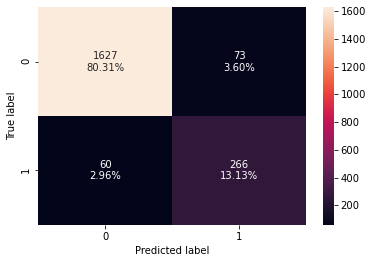

In [184]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",d_tree_model_train_perf)
d_tree_model_test_perf=model_performance_classification_sklearn(d_tree,X_val,y_val)
print("Validation performance:\n",d_tree_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(d_tree,X_val,y_val)

Severe overfitting and poor performance. It's to be expected really since this hasn't been tuned. Decision trees really need tuning.

### Oversampled Data

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.930898  0.837423   0.758333  0.795918


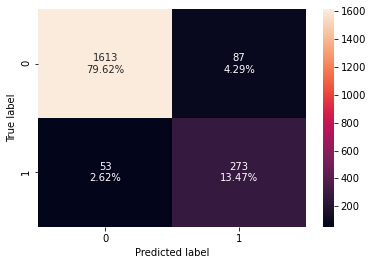

In [185]:
#Fitting the model
d_tree_over = DecisionTreeClassifier(random_state=1)
d_tree_over.fit(X_train_over,y_train_over)

#Calculating different metrics
d_tree_over_model_train_perf=model_performance_classification_sklearn(d_tree_over,X_train_over,y_train_over)
print("Training performance:\n",d_tree_over_model_train_perf)
d_tree_over_model_test_perf=model_performance_classification_sklearn(d_tree_over,X_val,y_val)
print("Validation performance:\n",d_tree_over_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(d_tree_over,X_val,y_val)

That's a large boost in performance, but the overfitting is still a big problem.

### Undersampled Data

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Validation performance:
    Accuracy   Recall  Precision        F1
0  0.901777  0.91411   0.635394  0.749686


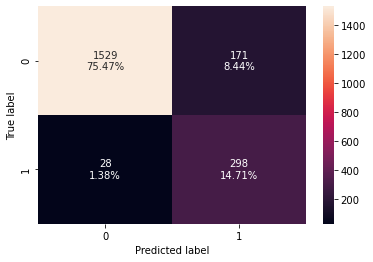

In [186]:
#Fitting the model
d_tree_un = DecisionTreeClassifier(random_state=1)
d_tree_un.fit(X_train_un,y_train_un)

#Calculating different metrics
d_tree_un_model_train_perf=model_performance_classification_sklearn(d_tree_un,X_train_un,y_train_un)
print("Training performance:\n",d_tree_un_model_train_perf)
d_tree_un_model_test_perf=model_performance_classification_sklearn(d_tree_un,X_val,y_val)
print("Validation performance:\n",d_tree_un_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(d_tree_un,X_val,y_val)

That's an even higher performance, even though precision took a hit we're primarily concerned with recall. Even without tuning this is a strong contender.

## Logistic Regression Classifier

### Base Training Data

Training performance:
    Accuracy    Recall  Precision       F1
0  0.901235  0.558402   0.763305  0.64497
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.910168  0.588957        0.8  0.678445


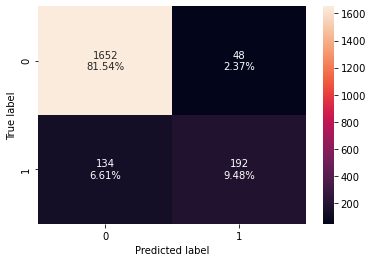

In [187]:
#Fitting the model
#l1 penality is similar to Lasso and should help with the curse of dimensionality
log_reg = LogisticRegression(random_state=1,penalty='l1',solver='liblinear') 
log_reg.fit(X_train,y_train)

#Calculating different metrics
log_reg_model_train_perf=model_performance_classification_sklearn(log_reg,X_train,y_train)
print("Training performance:\n",log_reg_model_train_perf)
log_reg_model_test_perf=model_performance_classification_sklearn(log_reg,X_val,y_val)
print("Validation performance:\n",log_reg_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(log_reg,X_val,y_val)

That's quite a bad performance, but at least it isn't overfitting.

The default log_reg penalty is l2. I am curious if that would work better.

Training performance:
    Accuracy    Recall  Precision        F1
0  0.888395  0.497951   0.721068  0.589091
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.898322  0.546012   0.754237  0.633452


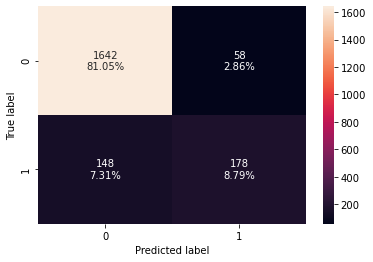

In [188]:
#Fitting the model
log_reg_l2 = LogisticRegression(random_state=1,penalty='l2')
log_reg_l2.fit(X_train,y_train)

#Calculating different metrics
log_reg_model_train_perf=model_performance_classification_sklearn(log_reg_l2,X_train,y_train)
print("Training performance:\n",log_reg_model_train_perf)
log_reg_model_test_perf=model_performance_classification_sklearn(log_reg_l2,X_val,y_val)
print("Validation performance:\n",log_reg_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(log_reg_l2,X_val,y_val)

Nope. At least I was justified in thinking the lasso would work better with so many low-impact features.

### Oversampled Data

Training performance:
    Accuracy    Recall  Precision       F1
0  0.852716  0.856835   0.849835  0.85332
Validation performance:
    Accuracy    Recall  Precision       F1
0   0.85538  0.861963   0.531191  0.65731


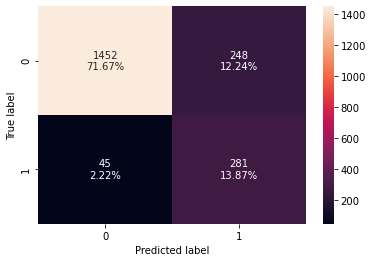

In [189]:
#Fitting the model
#l1 penality is similar to Lasso and should help with the curse of dimensionality
log_reg_over = LogisticRegression(random_state=1,penalty='l1',solver='liblinear') 
log_reg_over.fit(X_train_over,y_train_over)

#Calculating different metrics
log_reg_over_model_train_perf=model_performance_classification_sklearn(log_reg_over,X_train_over,y_train_over)
print("Training performance:\n",log_reg_over_model_train_perf)
log_reg_over_model_test_perf=model_performance_classification_sklearn(log_reg_over,X_val,y_val)
print("Validation performance:\n",log_reg_over_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(log_reg_over,X_val,y_val)

Wow! Oversampling really helped a lot! it jumped more than .25 recall. With almost no overfit, this is very promising.

### Undersampled Data

Training performance:
    Accuracy    Recall  Precision        F1
0  0.846311  0.848361   0.844898  0.846626
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.849951  0.858896   0.520446  0.648148


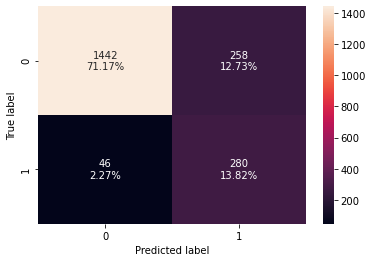

In [190]:
#Fitting the model
#l1 penality is similar to Lasso and should help with the curse of dimensionality
log_reg_un = LogisticRegression(random_state=1,penalty='l1',solver='liblinear') 
log_reg_un.fit(X_train_un,y_train_un)

#Calculating different metrics
log_reg_un_model_train_perf=model_performance_classification_sklearn(log_reg_un,X_train_un,y_train_un)
print("Training performance:\n",log_reg_un_model_train_perf)
log_reg_un_model_test_perf=model_performance_classification_sklearn(log_reg_un,X_val,y_val)
print("Validation performance:\n",log_reg_un_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(log_reg_un,X_val,y_val)

Performance in undersampling is actually a tad lower, which surprises me considering all of the others did better with undersampling.

I think I will want to tune the logistic regression to see how class weights play in. Also, it is not overfitting and that is a huge plus.

## Stacking Classifier

Stacking is a bit different. For this, I'm going to pair models of the same type together. So, for base stacking I'll stack all base data models. For oversampled, I'll stack all oversampled data models, etc.

The best-in-class model is what gets to be final estimator.

If I decide to tune it, I'll swap out different models to see which combination performs best.

### Base Training Data

In [191]:
estimators = [('Bagging', bagging_classifier), ('Logistic Reg',log_reg),
              ('Decision Tree',d_tree), ('Random Forest', rf_estimator),
             ('Gradient Boost',gb_classifier)]
# ('XGBoost',xgb_classifier) is out because it's currently the best, so it's final.
final_estimator = xgb_classifier

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Bagging', BaggingClassifier(random_state=1)),
                               ('Logistic Reg',
                                LogisticRegression(penalty='l1', random_state=1,
                                                   solver='liblinear')),
                               ('Decision Tree',
                                DecisionTreeClassifier(random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(random_state=1)),
                               ('Gradient Boost',
                                GradientBoostingClassifier(random_state=1))],
                   final_estimator=...
                                                 eval_metric='logloss', gamma=0,
                                                 gpu_id=-1,
                                                 importance_type='gain',
                                                 interaction_constraints='',
                 

Training performance:
    Accuracy    Recall  Precision        F1
0  0.994568  0.979508   0.986584  0.983033
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.967423  0.895706   0.901235  0.898462


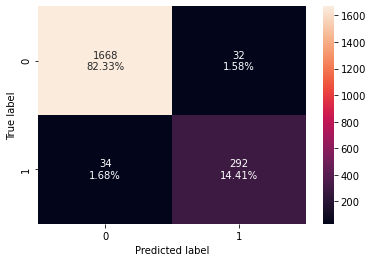

In [192]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_val,y_val)
print("Validation performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_val,y_val)

Very good accuracy and precision, which has lagged in most models. Recall is not within our desired performance specs though.

### Oversampled Data

In [193]:
estimators = [('Bagging', bagging_classifier_over),
              ('Decision Tree',d_tree_over), ('Random Forest', rf_estimator_over),
              ('Logistic Reg',log_reg_over), ('Gradient Boost', gb_over_classifier)]
# ('XGBoost',xgb_classifier_over) is out because it's currently the best, so it's final.
final_estimator = xgb_classifier_over 

stacking_classifier_over= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier_over.fit(X_train_over,y_train_over)

StackingClassifier(estimators=[('Bagging', BaggingClassifier(random_state=1)),
                               ('Decision Tree',
                                DecisionTreeClassifier(random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(random_state=1)),
                               ('Logistic Reg',
                                LogisticRegression(penalty='l1', random_state=1,
                                                   solver='liblinear')),
                               ('Gradient Boost',
                                GradientBoostingClassifier(random_state=1))],
                   final_estimator=...
                                                 eval_metric='logloss', gamma=0,
                                                 gpu_id=-1,
                                                 importance_type='gain',
                                                 interaction_constraints='',
                 

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.955577  0.849693   0.871069  0.860248


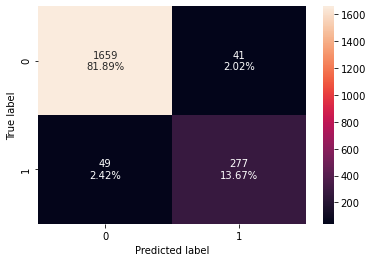

In [194]:
#Calculating different metrics
stacking_classifier_over_model_train_perf=model_performance_classification_sklearn(stacking_classifier_over,X_train_over,y_train_over)
print("Training performance:\n",stacking_classifier_over_model_train_perf)
stacking_classifier_over_model_test_perf=model_performance_classification_sklearn(stacking_classifier_over,X_val,y_val)
print("Validation performance:\n",stacking_classifier_over_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier_over,X_val,y_val)

Worse overall performance compared to baseline.

### Undersampled Data

In [195]:
estimators = [('Bagging', bagging_classifier_un), ('Logistic Reg',log_reg_un),
              ('Decision Tree',d_tree_un), ('Random Forest', rf_estimator_un),
             ('XGBoost',xgb_classifier)]

final_estimator = gb_un_classifier

stacking_classifier_un= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier_un.fit(X_train_un,y_train_un)

StackingClassifier(estimators=[('Bagging', BaggingClassifier(random_state=1)),
                               ('Logistic Reg',
                                LogisticRegression(penalty='l1', random_state=1,
                                                   solver='liblinear')),
                               ('Decision Tree',
                                DecisionTreeClassifier(random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(random_state=1)),
                               ('XGBoost',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              c...
                                              interaction_constraints='',
                                              learning_rate=0.300000012,
                                              max_delta_step=0, max_depth=6,
          

Training performance:
    Accuracy    Recall  Precision        F1
0  0.998975  0.997951        1.0  0.998974
Validation performance:
    Accuracy   Recall  Precision        F1
0  0.932873  0.95092    0.72093  0.820106


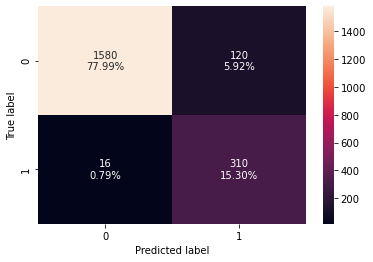

In [196]:
#Calculating different metrics
stacking_classifier_un_model_train_perf=model_performance_classification_sklearn(stacking_classifier_un,X_train_un,y_train_un)
print("Training performance:\n",stacking_classifier_un_model_train_perf)
stacking_classifier_un_model_test_perf=model_performance_classification_sklearn(stacking_classifier_un,X_val,y_val)
print("Validation performance:\n",stacking_classifier_un_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier_un,X_val,y_val)

Not a bad performance, but its precision falls just under performance specs.

It's also overfit.

## Comparing Non-tuned Models

In [197]:
# training performance comparison

models_train_comp_df = pd.concat(
    [gb_classifier_model_train_perf.T,
     gb_over_classifier_model_train_perf.T,
     gb_un_classifier_model_train_perf.T,
     d_tree_model_train_perf.T,
     d_tree_over_model_train_perf.T,
     d_tree_un_model_train_perf.T,
     rf_estimator_model_train_perf.T,
     rf_estimator_over_model_train_perf.T,
     rf_estimator_un_model_train_perf.T,
     bagging_classifier_model_train_perf.T,
     bagging_classifier_over_model_train_perf.T,
     bagging_classifier_un_model_train_perf.T,
     log_reg_model_train_perf.T,
     log_reg_over_model_train_perf.T,
     log_reg_un_model_train_perf.T,
     xgb_classifier_model_train_perf.T,
     xgb_classifier_over_model_train_perf.T,
     xgb_classifier_un_model_train_perf.T,
     stacking_classifier_model_train_perf.T,
     stacking_classifier_over_model_train_perf.T,
     stacking_classifier_un_model_train_perf.T],
     axis=1,)

models_train_comp_df.columns = [
    "Gradient Boost",
    "Gradient Boost Over",
    "Gradient Boost Under",
    "Decision Tree",
    "Decision Tree Over",
    "Decision Tree Under",
    "Random Forest Estimator",
    "Random Forest Estimator Over",
    "Random Forest Estimator Under",
    "Bagging Classifier",
    "Bagging Classifier Over",
    "Bagging Classifier Under",
    "Logistic Regression",
    "Logistic Regression Over",
    "Logistic Regression Under",
    "XGBoost Classifier",
    "XGBoost Classifier Over",
    "XGBoost Classifier Under",
    "Stacking Classifier",
    "Stacking Classifier Over",
    "Stacking Classifier Under"]
print("Training performance comparison:")
models_train_comp_df.T

Training performance comparison:


Accuracy    Recall  Precision        F1
Gradient Boost                 0.973498  0.876025   0.955307  0.913950
Gradient Boost Over            0.971367  0.980192   0.963191  0.971617
Gradient Boost Under           0.974898  0.981557   0.968655  0.975064
Decision Tree                  1.000000  1.000000   1.000000  1.000000
Decision Tree Over             1.000000  1.000000   1.000000  1.000000
Decision Tree Under            1.000000  1.000000   1.000000  1.000000
Random Forest Estimator        1.000000  1.000000   1.000000  1.000000
Random Forest Estimator Over   1.000000  1.000000   1.000000  1.000000
Random Forest Estimator Under  1.000000  1.000000   1.000000  1.000000
Bagging Classifier             0.996543  0.981557   0.996878  0.989158
Bagging Classifier Over        0.998725  0.999216   0.998237  0.998726
Bagging Classifier Under       0.995902  0.993852   0.997942  0.995893
Logistic Regression            0.888395  0.497951   0.721068  0.589091
Logistic Regression Over       0.852716  0.856835   0.849835  0.853320
Logistic Regression Under      0.846311  0.848361   0.844898  0.846626
XGBoost Classifier             1.000000  1.000000   1.000000  1.000000
XGBoost Classifier Over        0.999902  1.000000   0.999804  0.999902
XGBoost Classifier Under       1.000000  1.000000   1.000000  1.000000
Stacking Classifier            0.994568  0.979508   0.986584  0.983033
Stacking Classifier Over       1.000000  1.000000   1.000000  1.000000
Stacking Classifier Under      0.998975  0.997951   1.000000  0.998974

In [198]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [gb_classifier_model_test_perf.T,
     gb_over_classifier_model_test_perf.T,
     gb_un_classifier_model_test_perf.T,
     d_tree_model_test_perf.T,
     d_tree_over_model_test_perf.T,
     d_tree_un_model_test_perf.T,
     rf_estimator_model_test_perf.T,
     rf_estimator_over_model_test_perf.T,
     rf_estimator_un_model_test_perf.T,
     bagging_classifier_model_test_perf.T,
     bagging_classifier_over_model_test_perf.T,
     bagging_classifier_un_model_test_perf.T,
     log_reg_model_test_perf.T,
     log_reg_over_model_test_perf.T,
     log_reg_un_model_test_perf.T,
     xgb_classifier_model_test_perf.T,
     xgb_classifier_over_model_test_perf.T,
     xgb_classifier_un_model_test_perf.T,
     stacking_classifier_model_test_perf.T,
     stacking_classifier_over_model_test_perf.T,
     stacking_classifier_un_model_test_perf.T],
     axis=1,)

models_val_comp_df.columns = [
    "Gradient Boost",
    "Gradient Boost Over",
    "Gradient Boost Under",
    "Decision Tree",
    "Decision Tree Over",
    "Decision Tree Under",
    "Random Forest Estimator",
    "Random Forest Estimator Over",
    "Random Forest Estimator Under",
    "Bagging Classifier",
    "Bagging Classifier Over",
    "Bagging Classifier Under",
    "Logistic Regression",
    "Logistic Regression Over",
    "Logistic Regression Under",
    "XGBoost Classifier",
    "XGBoost Classifier Over",
    "XGBoost Classifier Under",
    "Stacking Classifier",
    "Stacking Classifier Over",
    "Stacking Classifier Under"]
print("Validation performance comparison:")
models_val_comp_df.T

Validation performance comparison:


Accuracy    Recall  Precision        F1
Gradient Boost                 0.967917  0.858896   0.936455  0.896000
Gradient Boost Over            0.954097  0.941718   0.805774  0.868458
Gradient Boost Under           0.935341  0.963190   0.725173  0.827404
Decision Tree                  0.934353  0.815951   0.784661  0.800000
Decision Tree Over             0.930898  0.837423   0.758333  0.795918
Decision Tree Under            0.901777  0.914110   0.635394  0.749686
Random Forest Estimator        0.963968  0.834356   0.934708  0.881686
Random Forest Estimator Over   0.959033  0.895706   0.856305  0.875562
Random Forest Estimator Under  0.937315  0.966154   0.730233  0.831788
Bagging Classifier             0.953603  0.812883   0.889262  0.849359
Bagging Classifier Over        0.947680  0.889571   0.805556  0.845481
Bagging Classifier Under       0.925962  0.932515   0.703704  0.802111
Logistic Regression            0.898322  0.546012   0.754237  0.633452
Logistic Regression Over       0.855380  0.861963   0.531191  0.657310
Logistic Regression Under      0.849951  0.858896   0.520446  0.648148
XGBoost Classifier             0.971372  0.901840   0.918750  0.910217
XGBoost Classifier Over        0.965943  0.917178   0.876833  0.896552
XGBoost Classifier Under       0.937808  0.956923   0.735225  0.831551
Stacking Classifier            0.967423  0.895706   0.901235  0.898462
Stacking Classifier Over       0.955577  0.849693   0.871069  0.860248
Stacking Classifier Under      0.932873  0.950920   0.720930  0.820106

Now I have to choose the three models I want to hypertune. This does not necessarily mean I pick the highest performing models, though I do want to tune one of those.

As the only parametric model, I am very curious if tuning can push logistic regression up. It also didn't overfit much, which is a plus.

XGBoost_under also has excellent recall while being top in class for f1, and I think tuning it could improve its performance even more.

Lastly, in my past experience tuning decision trees has resulted in massive improvements in performance. Given by default it is already doing so well, I think it has a strong chance to excel. So, I'm going to tune the decision tree as well as the random forest decision tree.

Models to tune:
* log_reg_over
* dtree_un
* xgb_classifier_un
* rf_estimator_un
* Gradient Boost_un



# Hypertuning Some Models

## Gradient Boost Tuning

### Randomized Search CV

In [199]:
%%time

# defining model

model = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

#Parameter grid to pass in RandomizedSearchCV

param_grid={'class__n_estimators':np.arange(50,150,50),
            'class__subsample':[0.8,0.9,1],
            'class__max_features':[0.7,0.8,0.9,1]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)


pipeline = Pipeline([('sampling', rus),('class', model)]) #understampling

#Calling RandomizedSearchCV
gb_tuned = RandomizedSearchCV(estimator=pipeline,
                                        param_distributions=param_grid,
                                        n_iter=50,
                                        scoring=scorer,
                                        cv=5,
                                        random_state=1,
                                        n_jobs = -1)



# X_train_over, y_train_over = sm.fit_resample(X_temp, y_temp)



#Fitting parameters in RandomizedSearchCV
gb_tuned.fit(X_temp, y_temp)

print("Best parameters are {} with CV score={}:" .format(gb_tuned.best_params_, gb_tuned.best_score_))

Best parameters are {'class__subsample': 0.9, 'class__n_estimators': 100, 'class__max_features': 0.7} with CV score=0.945446507515473:
Wall time: 5.73 s


Training performance:
    Accuracy    Recall  Precision        F1
0  0.941399  0.979508   0.739938  0.843034
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.940276  0.966154   0.740566  0.838451


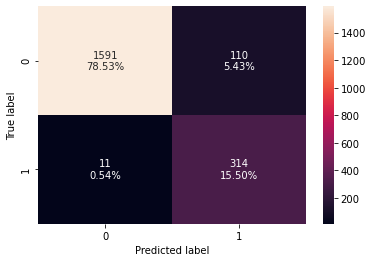

In [200]:
#Calculating different metrics
gb_tuned_model_train_perf=model_performance_classification_sklearn(gb_tuned,X_train,y_train)
print("Training performance:\n",gb_tuned_model_train_perf)
gb_tuned_model_test_perf=model_performance_classification_sklearn(gb_tuned,X_test,y_test)
print("Testing performance:\n",gb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_tuned, X_test,y_test)

That is an absolutely fantastic recall while maintaining a precision well within our desired scope. Also, there is no overfit.

## Logistic Regression Tuning

Logistic regression is a parametric classifier, making it different from the others I chose. That means it requires a bit different of an approach for tuning. First I have to make some functions specifically for logistic regressions.

In [201]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [202]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [203]:
def custom_metrics_score(y_actual, y_prob):
    '''
    This is a custom defined function that is wrapped using make_scorer later on and passed as an input to SFS.
    '''
    # defining an empty list to store train and test results
    
    threshold=0.414019
    
    pred_train = (y_prob > threshold)
    

    pred_train = np.round(pred_train)
    
    train_recall = recall_score(y_actual, pred_train)
    
#     print(train_recall)
    
    return train_recall

In [204]:
thres_scorer = make_scorer(score_func=custom_metrics_score, greater_is_better=True,needs_proba=True)

In [205]:
def optimal_threshold_model(model):
    #We have to search for thresholds while checking the other hyperparameters. This will do that.
    fpr,tpr,thresholds = metrics.roc_curve(y_val,model.predict_proba(X_val)[:,1]) #was originally X_test
    optimal_idx=np.argmax(tpr-fpr)
    optimal_threshold_auc_roc=thresholds[optimal_idx]
    return optimal_threshold_auc_roc

In [206]:
def get_metrics_score(model,train,val,train_y,val_y,threshold=0.5,flag=True,roc=False):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, val: Independent features
    train_y,val_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and val results
    
    score_list=[] 
    
    pred_train = (model.predict_proba(train)[:,1]>threshold)
    pred_val = (model.predict_proba(val)[:,1]>threshold)

    pred_train = np.round(pred_train)
    pred_val = np.round(pred_val)
    
    train_acc = accuracy_score(pred_train,train_y)
    val_acc = accuracy_score(pred_val,val_y)
    
    train_recall = recall_score(train_y,pred_train)
    val_recall = recall_score(val_y,pred_val)
    
    train_precision = precision_score(train_y,pred_train)
    val_precision = precision_score(val_y,pred_val)
    
    train_f1 = f1_score(train_y,pred_train)
    val_f1 = f1_score(val_y,pred_val)
    
    
    score_list.extend((train_acc,val_acc,train_recall,val_recall,train_precision,val_precision,train_f1,val_f1))
        
    
    if flag == True:
        print("-"*50)
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on val set : ",accuracy_score(pred_val,val_y))
        
        print("-"*50)
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on val set : ",recall_score(val_y,pred_val))
        
        print("-"*50)
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on val set : ",precision_score(val_y,pred_val))
        
        print("-"*50)
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on val set : ",f1_score(val_y,pred_val))
        
        print("-"*50)
        print("Log Loss on Training: ", log_loss(train_y, pred_train.astype(float)))
   
    if roc == True:
        print("-"*50)
        print("ROC-AUC Score on training set : ",roc_auc_score(train_y,pred_train))
        print("ROC-AUC Score on val set : ",roc_auc_score(val_y,pred_val))
    
    return score_list # returning the list with train and val scores

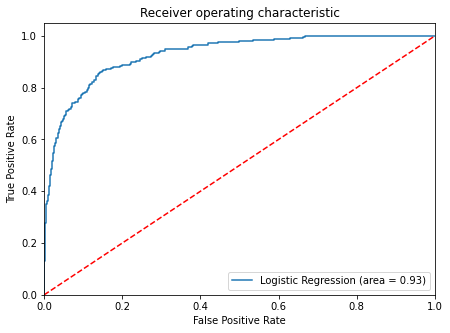

In [207]:
#Plotting the AUC-ROC curse to see which threshold gives us the greatest gains
logit_roc_auc_train = roc_auc_score(y_val, log_reg_over.predict_proba(X_val)[:, 1])
fpr, tpr, thresholds = roc_curve(y_val, log_reg_over.predict_proba(X_val)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [208]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_val, log_reg_over.predict_proba(X_val)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.5024393102868505


In [209]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    log_reg_over, X_train_over, y_train_over, threshold =0.43204421603802773
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.854089  0.886056   0.832811  0.858609

In [210]:
log_reg_model_val_perf = model_performance_classification_sklearn_with_threshold(
    log_reg_over, X_val, y_val, threshold =0.43204421603802773
)

print("Validation performance:")
log_reg_model_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0  0.831688  0.880368   0.487267  0.627322

That's the threshold we want if we want the best bang for our buck, so to speak, for the default parameters (well, technically I changed it to l1). But its recall is still not where I want it to be and its precision is really bad.

I'm going to plot precision and recall to see if I can hope to get where I want just with thresholds.

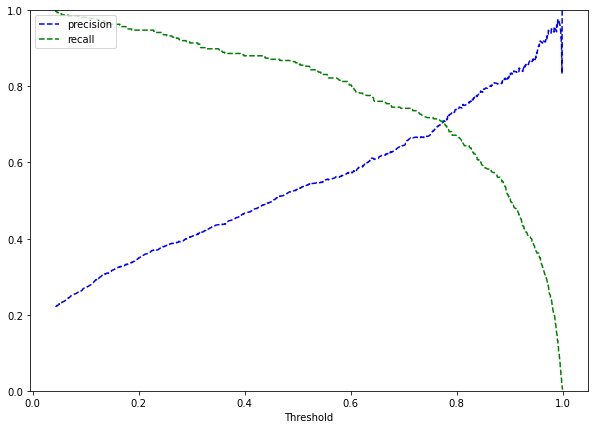

In [211]:
#Plotting precision to recall of the model
y_scores = log_reg_over.predict_proba(X_val)[:, 1]
prec, rec, tre = precision_recall_curve(y_val, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

That's not looking good. I sacrifice far too much to get above .95 recall. Time to do a more in-depth search using RandomizedSearchCV

### RandomizedSearchCV

In [212]:
%%time

# defining model

model = LogisticRegression(random_state=1)

#Parameter grid to pass in GridSearchCV

param_grid = {
    "class__C": np.arange(0.1,1,0.1),
    "class__class_weight": ["balanced", None],
    "class__solver": ['newton-cg', "lbfgs",'liblinear','sag','saga']
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Oversampling did better so I want to do that on all the training folds.
pipeline = Pipeline(steps=[('sampling', sm),('class', model)])

#('sampling', sm),
#Calling RandomizedSearchCV
logreg_rando = RandomizedSearchCV(estimator=pipeline,
                                        param_distributions=param_grid,
                                        n_iter=100,
                                        scoring=scorer,
                                        cv=5,
                                        random_state=1,
                                        n_jobs = -1)



# X_train_over, y_train_over = sm.fit_resample(X_temp, y_temp)



#Fitting parameters in RandomizedSearchCV
logreg_rando.fit(X_temp, y_temp)

print("Best parameters are {} with CV score={}:" .format(logreg_rando.best_params_,logreg_rando.best_score_))

Best parameters are {'class__solver': 'newton-cg', 'class__class_weight': 'balanced', 'class__C': 0.2} with CV score=0.8433333333333334:
Wall time: 28.9 s


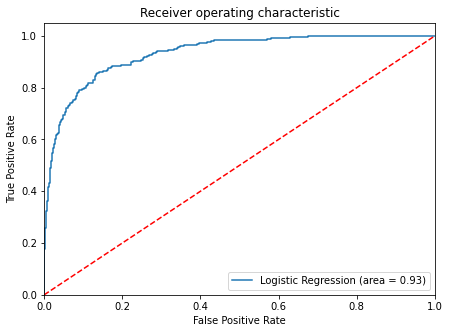

In [213]:
#Plotting the AUC-ROC curse to see which threshold gives us the greatest gains
logit_roc_auc_train = roc_auc_score(y_val, logreg_rando.predict_proba(X_val)[:, 1])
fpr, tpr, thresholds = roc_curve(y_val, logreg_rando.predict_proba(X_val)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [214]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_val, logreg_rando.predict_proba(X_val)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.5191027277247878


In [215]:
logreg_rando_model_train_perf = model_performance_classification_sklearn_with_threshold(
    logreg_rando, X_train, y_train, threshold =0.5191028952717612
)

print("Training performance:")
logreg_rando_model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0   0.85284  0.830943   0.526623  0.644674

In [216]:
logreg_rando_model_val_perf = model_performance_classification_sklearn_with_threshold(
    logreg_rando, X_val, y_val, threshold =0.5191028952717612
)
print("Validation performance:")
logreg_rando_model_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0  0.863277  0.852761   0.548323  0.667467

In [217]:
logreg_rando_model_test_perf = model_performance_classification_sklearn_with_threshold(
    logreg_rando, X_test, y_test, threshold =0.5191028952717612
)
print("Test performance:")
logreg_rando_model_test_perf

Test performance:


Accuracy    Recall  Precision        F1
0  0.852419  0.867692   0.524164  0.653534

Ultimately I could not get Logistic regression where I wanted it to be. Time to move on.

## Decision Tree Tuning

### GridSearchCV

In [218]:
model = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'class__max_depth': [2,4,6,8], 
              'class__min_samples_leaf': [1, 2, 5,],
              'class__max_leaf_nodes' : [2, 3, 5],
              'class__min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Undersampling did better so I want to do that on all the training folds.
pipeline = Pipeline(steps=[('sampling', rus),('class', model)])

# Run the grid search
grid_obj = GridSearchCV(pipeline, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_temp, y_temp)

# Set the clf to the best combination of parameters
dtree_un_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_un_tuned.fit(X_temp, y_temp)

Pipeline(steps=[('sampling', RandomUnderSampler(random_state=1)),
                ('class',
                 DecisionTreeClassifier(max_depth=4, max_leaf_nodes=5,
                                        min_impurity_decrease=0.0001,
                                        random_state=1))])

Training performance:
    Accuracy    Recall  Precision        F1
0  0.737449  0.963115    0.37615  0.541007
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.738894  0.963077   0.377108  0.541991


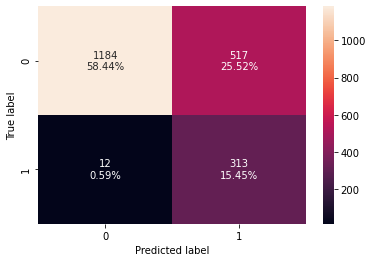

In [219]:
#Calculating different metrics
dtree_un_tuned_model_train_perf=model_performance_classification_sklearn(dtree_un_tuned,X_train,y_train)
print("Training performance:\n",dtree_un_tuned_model_train_perf)
dtree_un_tuned_model_test_perf=model_performance_classification_sklearn(dtree_un_tuned,X_test,y_test)
print("Testing performance:\n",dtree_un_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_un_tuned,X_test,y_test)

Not too bad. That precision is far too low though. I can probably get a better overall result with RandomizedSearchCV.

### RandomSearchCV

In [220]:
%%time

# defining model

model = DecisionTreeClassifier(random_state=1)

#Parameter grid to pass in GridSearchCV

param_grid = {
    "class__max_depth": np.arange(2,30,1),
    "class__criterion": ["entropy", "gini"],
    "class__splitter": ["best", "random"],
    "class__min_impurity_decrease": np.arange(0.01, 0.1,0.01),
    'class__min_samples_leaf': np.arange(1,10,1),
    'class__max_leaf_nodes' : np.arange(2,15,1)
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)


pipeline = Pipeline([('sampling', rus), ('class', model)])

#Calling RandomizedSearchCV
d_tree_rando_tuned = RandomizedSearchCV(estimator=pipeline,
                                        param_distributions=param_grid,
                                        n_iter=100,
                                        scoring=scorer,
                                        cv=5,
                                        random_state=1,
                                        n_jobs = -1)



# X_train_over, y_train_over = sm.fit_resample(X_temp, y_temp)



#Fitting parameters in RandomizedSearchCV
d_tree_rando_tuned.fit(X_temp, y_temp)

print("Best parameters are {} with CV score={}:" .format(d_tree_rando_tuned.best_params_,d_tree_rando_tuned.best_score_))

Best parameters are {'class__splitter': 'best', 'class__min_samples_leaf': 9, 'class__min_impurity_decrease': 0.06999999999999999, 'class__max_leaf_nodes': 12, 'class__max_depth': 16, 'class__criterion': 'entropy'} with CV score=0.9531358679634542:
Wall time: 1.01 s


Training performance:
    Accuracy    Recall  Precision        F1
0  0.745957  0.956221   0.383549  0.547493
Testing performance:
    Accuracy  Recall  Precision        F1
0  0.746792    0.96   0.384236  0.548813


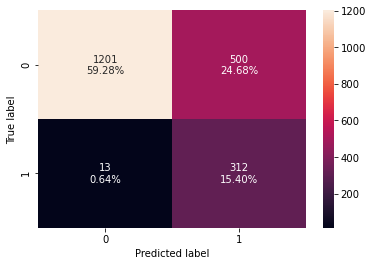

In [221]:
#Calculating different metrics
d_tree_rando_tuned_model_train_perf=model_performance_classification_sklearn(d_tree_rando_tuned,X_temp,y_temp)
print("Training performance:\n",d_tree_rando_tuned_model_train_perf)
d_tree_rando_tuned_model_test_perf=model_performance_classification_sklearn(d_tree_rando_tuned,X_test,y_test)
print("Testing performance:\n",d_tree_rando_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(d_tree_rando_tuned,X_test,y_test)

Not bad recall, not a lot of overfitting. Pretty solid, except for that precision, which is clearly unacceptable.

## XGBoost Classifier Tuning

### RandomizedSearchCV

In [222]:
%%time

# defining model

model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomizedSearchCV

param_grid={'class__n_estimators':np.arange(50,150,50),
            'class__scale_pos_weight':[2,5,10],
            'class__learning_rate':[0.01,0.1],
            'class__gamma':[0,1],
            'class__subsample':[0.8,0.9,1],
            'class__max_depth':np.arange(1,5,1),
            'class__reg_lambda':[5,10]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)


pipeline = Pipeline([('sampling', rus),('class', model)]) #understampling

#Calling RandomizedSearchCV
xgb_tuned = RandomizedSearchCV(estimator=pipeline,
                                        param_distributions=param_grid,
                                        n_iter=100,
                                        scoring=scorer,
                                        cv=5,
                                        random_state=1,
                                        n_jobs = -1)



# X_train_over, y_train_over = sm.fit_resample(X_temp, y_temp)



#Fitting parameters in RandomizedSearchCV
xgb_tuned.fit(X_temp.values, y_temp.values)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned.best_params_, xgb_tuned.best_score_))

Best parameters are {'class__subsample': 1, 'class__scale_pos_weight': 10, 'class__reg_lambda': 10, 'class__n_estimators': 50, 'class__max_depth': 1, 'class__learning_rate': 0.1, 'class__gamma': 1} with CV score=1.0:
Wall time: 13.8 s


Training performance:
    Accuracy  Recall  Precision        F1
0  0.299918     1.0   0.186651  0.314585
Validation performance:
    Accuracy  Recall  Precision       F1
0  0.298618     1.0   0.186606  0.31452


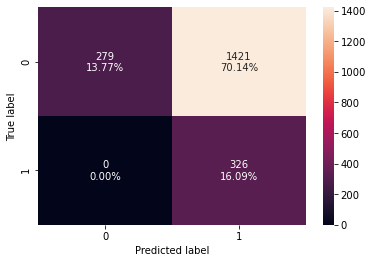

In [223]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train.values,y_train.values)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_val.values,y_val.values)
print("Validation performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned, X_val.values,y_val.values)

Well. The recall is perfect.

I think I'm going to have to run this again with f1 score to get a more balanced setup.

In [224]:
%%time

# defining model

model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomizedSearchCV

param_grid={'class__n_estimators':np.arange(50,150,50),
            'class__scale_pos_weight':[2,5,10],
            'class__learning_rate':[0.01,0.1],
            'class__gamma':[0,1],
            'class__subsample':[0.8,0.9,1],
            'class__max_depth':np.arange(1,5,1),
            'class__reg_lambda':[5,10]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)


pipeline = Pipeline([('sampling', rus),('class', model)])

#Calling RandomizedSearchCV
xgb_tuned_un = RandomizedSearchCV(estimator=pipeline,
                                        param_distributions=param_grid,
                                        n_iter=100,
                                        scoring=scorer,
                                        cv=5,
                                        random_state=1,
                                        n_jobs = -1)



# X_train_over, y_train_over = sm.fit_resample(X_temp, y_temp)



#Fitting parameters in RandomizedSearchCV
xgb_tuned_un.fit(X_temp.values, y_temp.values)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned_un.best_params_, xgb_tuned_un.best_score_))

Best parameters are {'class__subsample': 0.9, 'class__scale_pos_weight': 2, 'class__reg_lambda': 5, 'class__n_estimators': 100, 'class__max_depth': 3, 'class__learning_rate': 0.1, 'class__gamma': 1} with CV score=0.7806442249823722:
Wall time: 13.6 s


Training performance:
    Accuracy   Recall  Precision        F1
0  0.909959  0.98873   0.642905  0.779168
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.912142  0.981538   0.649695  0.781863


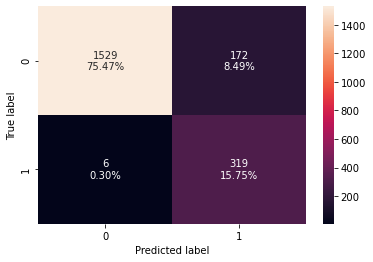

In [225]:
#Calculating different metrics
xgb_tuned_un_model_train_perf=model_performance_classification_sklearn(xgb_tuned_un,X_train.values,y_train.values)
print("Training performance:\n",xgb_tuned_un_model_train_perf)
xgb_tuned_un_model_test_perf=model_performance_classification_sklearn(xgb_tuned_un,X_test.values,y_test.values)
print("Validation performance:\n",xgb_tuned_un_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned_un, X_test.values,y_test.values)

See, that's way better. But I'm still not satisfied with that precision score. All three of these tuned models have struggled with precision.

New plan. I'm going to tune a model that had high f1 score. XGBoost trained on the original data had a very good f1, so let's see what happens there.

#### Original Data XGBoost

In [226]:
%%time

# defining model

model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomizedSearchCV

param_grid={'class__n_estimators':np.arange(50,150,50),
            'class__scale_pos_weight':[2,5,10],
            'class__learning_rate':[0.01,0.1],
            'class__gamma':[0,1],
            'class__subsample':[0.8,0.9,1],
            'class__max_depth':np.arange(1,5,1),
            'class__reg_lambda':[5,10]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#I have removed the sampler
pipeline = Pipeline([('class', model)])

#Calling RandomizedSearchCV
xgb_tuned = RandomizedSearchCV(estimator=pipeline,
                                        param_distributions=param_grid,
                                        n_iter=100,
                                        scoring=scorer,
                                        cv=5,
                                        random_state=1,
                                        n_jobs = -1)



# X_train_over, y_train_over = sm.fit_resample(X_temp, y_temp)



#Fitting parameters in RandomizedSearchCV
xgb_tuned.fit(X_temp.values, y_temp.values)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned.best_params_, xgb_tuned.best_score_))

Best parameters are {'class__subsample': 0.9, 'class__scale_pos_weight': 2, 'class__reg_lambda': 5, 'class__n_estimators': 100, 'class__max_depth': 3, 'class__learning_rate': 0.1, 'class__gamma': 1} with CV score=0.878806389028178:
Wall time: 22.7 s


Training performance:
    Accuracy    Recall  Precision        F1
0  0.970206  0.919057   0.897898  0.908354
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.968411  0.935385   0.876081  0.904762


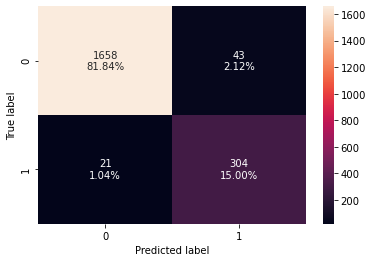

In [227]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train.values,y_train.values)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test.values,y_test.values)
print("Validation performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned, X_test.values,y_test.values)

and what if I maxxed recall?

In [228]:
# defining model

model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomizedSearchCV

param_grid={'class__n_estimators':np.arange(50,150,50),
            'class__scale_pos_weight':[2,5,10],
            'class__learning_rate':[0.01,0.1],
            'class__gamma':[0,1],
            'class__subsample':[0.8,0.9,1],
            'class__max_depth':np.arange(1,5,1),
            'class__reg_lambda':[5,10]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#I have removed the sampler
pipeline = Pipeline([('class', model)])

#Calling RandomizedSearchCV
xgb_tuned2 = RandomizedSearchCV(estimator=pipeline,
                                        param_distributions=param_grid,
                                        n_iter=100,
                                        scoring=scorer,
                                        cv=5,
                                        random_state=1,
                                        n_jobs = -1)



# X_train_over, y_train_over = sm.fit_resample(X_temp, y_temp)



#Fitting parameters in RandomizedSearchCV
xgb_tuned2.fit(X_temp.values, y_temp.values)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned2.best_params_, xgb_tuned2.best_score_))

Best parameters are {'class__subsample': 1, 'class__scale_pos_weight': 10, 'class__reg_lambda': 10, 'class__n_estimators': 50, 'class__max_depth': 2, 'class__learning_rate': 0.01, 'class__gamma': 1} with CV score=0.9777158856469201:


Training performance:
    Accuracy    Recall  Precision       F1
0  0.608889  0.982582    0.28903  0.44667
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.631787  0.993865   0.303371  0.464849


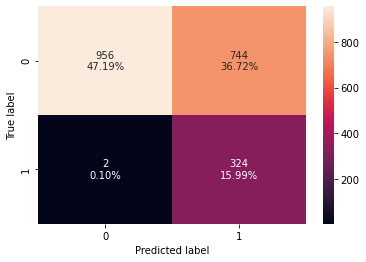

In [229]:
#Calculating different metrics
xgb_tuned2_model_train_perf=model_performance_classification_sklearn(xgb_tuned2,X_train.values,y_train.values)
print("Training performance:\n",xgb_tuned2_model_train_perf)
xgb_tuned2_model_test_perf=model_performance_classification_sklearn(xgb_tuned2,X_val.values,y_val.values)
print("Validation performance:\n",xgb_tuned2_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned2, X_val.values,y_val.values)

What if I maxxed accuracy?

In [230]:
# defining model

model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomizedSearchCV

param_grid={'class__n_estimators':np.arange(50,150,50),
            'class__scale_pos_weight':[2,5,10],
            'class__learning_rate':[0.01,0.1],
            'class__gamma':[0,1],
            'class__subsample':[0.8,0.9,1],
            'class__max_depth':np.arange(1,5,1),
            'class__reg_lambda':[5,10]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

#I have removed the sampler
pipeline = Pipeline([('class', model)])

#Calling RandomizedSearchCV
xgb_tuned3 = RandomizedSearchCV(estimator=pipeline,
                                        param_distributions=param_grid,
                                        n_iter=100,
                                        scoring=scorer,
                                        cv=5,
                                        random_state=1,
                                        n_jobs = -1)



# X_train_over, y_train_over = sm.fit_resample(X_temp, y_temp)



#Fitting parameters in RandomizedSearchCV
xgb_tuned3.fit(X_temp, y_temp)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned3.best_params_, xgb_tuned3.best_score_))

Best parameters are {'class__subsample': 0.9, 'class__scale_pos_weight': 2, 'class__reg_lambda': 5, 'class__n_estimators': 100, 'class__max_depth': 3, 'class__learning_rate': 0.1, 'class__gamma': 1} with CV score=0.9606223105688455:


Training performance:
    Accuracy    Recall  Precision        F1
0  0.970206  0.919057   0.897898  0.908354
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.968411  0.935385   0.876081  0.904762


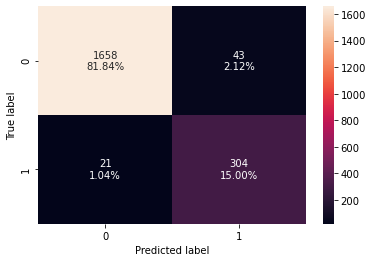

In [231]:
#Calculating different metrics
xgb_tuned3_model_train_perf=model_performance_classification_sklearn(xgb_tuned3,X_train,y_train)
print("Training performance:\n",xgb_tuned3_model_train_perf)
xgb_tuned3_model_test_perf=model_performance_classification_sklearn(xgb_tuned3,X_test,y_test)
print("Validation performance:\n",xgb_tuned3_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned3, X_test,y_test)

Oh look it's the same as maxing f1 score.

All of these models are fantastic. A .9 F1 score is extremely good, especially compared to everything else we've tried.

However, I was given a strict threshold of .95 recall, so this model does not pass muster.

I'll try it on the test data as well just to see.

Training performance:
    Accuracy    Recall  Precision        F1
0  0.970206  0.919057   0.897898  0.908354
Test performance:
    Accuracy    Recall  Precision        F1
0  0.968411  0.935385   0.876081  0.904762


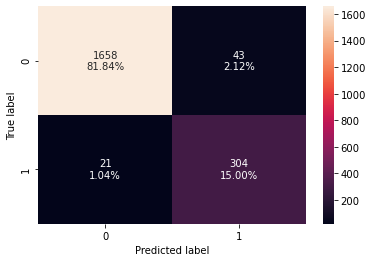

In [232]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train.values,y_train.values)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test.values,y_test.values)
print("Test performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned, X_test.values,y_test.values)

Still really good, but recall just falls sort of our .95 goal.

Ok time to look at random forest.

## Random Forest Tuning

### RandomizedSearch CV

In [233]:
# defining model

model = RandomForestClassifier(random_state=1)

#Parameter grid to pass in RandomizedSearchCV

param_grid = {
    "class__max_depth": np.arange(2,30,1),
    "class__criterion": ["entropy", "gini"],
    'class__max_features': ['sqrt','log2',None],
    "class__min_impurity_decrease": np.arange(0.0, 0.1,0.01),
    'class__min_samples_leaf': np.arange(1,10,1),
    'class__max_leaf_nodes' : np.arange(2,15,1),
    'class__bootstrap':[True,False],
    'class__class_weight': ['balanced','balanced_subsample',None]
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#I have removed the sampler
pipeline = Pipeline([('class', model)])

#Calling RandomizedSearchCV
rf_tuned = RandomizedSearchCV(estimator=pipeline,
                                        param_distributions=param_grid,
                                        n_iter=100,
                                        scoring=scorer,
                                        cv=5,
                                        random_state=1,
                                        n_jobs = -1)



# X_train_over, y_train_over = sm.fit_resample(X_temp, y_temp)



#Fitting parameters in RandomizedSearchCV
rf_tuned.fit(X_temp, y_temp)

print("Best parameters are {} with CV score={}:" .format(rf_tuned.best_params_, rf_tuned.best_score_))

Best parameters are {'class__min_samples_leaf': 5, 'class__min_impurity_decrease': 0.03, 'class__max_leaf_nodes': 10, 'class__max_features': None, 'class__max_depth': 26, 'class__criterion': 'gini', 'class__class_weight': 'balanced_subsample', 'class__bootstrap': False} with CV score=0.9554465075154731:


Training performance:
    Accuracy    Recall  Precision        F1
0   0.72856  0.967213   0.368606  0.533786
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.728036  0.963077   0.367371  0.531861


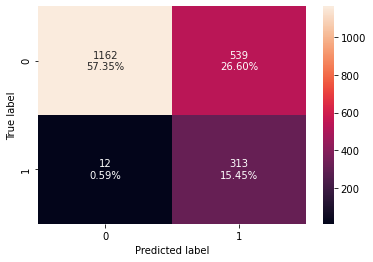

In [234]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

Precision continues to be my bane.

The default values for an undersampled rf tree met our performance specs. Let's see if tuning it can boost it higher.

#### Undersampled data

In [235]:
# defining model

model = RandomForestClassifier(random_state=1)

#Parameter grid to pass in RandomizedSearchCV

param_grid = {
    "class__max_depth": np.arange(2,30,1),
    "class__criterion": ["entropy", "gini"],
    'class__max_features': ['sqrt','log2',None],
    "class__min_impurity_decrease": np.arange(0.0, 0.1,0.01),
    'class__min_samples_leaf': np.arange(1,10,1),
    'class__max_leaf_nodes' : np.arange(2,15,1),
    'class__bootstrap':[True,False],
    'class__class_weight': ['balanced','balanced_subsample',None]
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#I have removed the sampler
pipeline = Pipeline([('sampling', rus),('class', model)])

#Calling RandomizedSearchCV
rf_tuned_un = RandomizedSearchCV(estimator=pipeline,
                                        param_distributions=param_grid,
                                        n_iter=100,
                                        scoring=scorer,
                                        cv=5,
                                        random_state=1,
                                        n_jobs = -1)



# X_train_over, y_train_over = sm.fit_resample(X_temp, y_temp)



#Fitting parameters in RandomizedSearchCV
rf_tuned_un.fit(X_temp, y_temp)

print("Best parameters are {} with CV score={}:" .format(rf_tuned_un.best_params_, rf_tuned_un.best_score_))

Best parameters are {'class__min_samples_leaf': 8, 'class__min_impurity_decrease': 0.01, 'class__max_leaf_nodes': 5, 'class__max_features': None, 'class__max_depth': 18, 'class__criterion': 'entropy', 'class__class_weight': None, 'class__bootstrap': False} with CV score=0.9531358679634542:


Training performance:
    Accuracy    Recall  Precision        F1
0   0.74535  0.956967   0.382944  0.546999
Testing performance:
    Accuracy  Recall  Precision        F1
0  0.746792    0.96   0.384236  0.548813


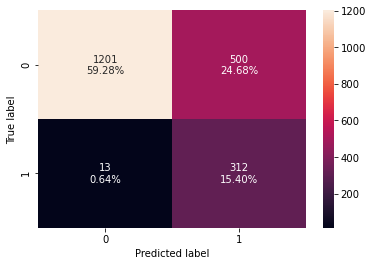

In [236]:
#Calculating different metrics
rf_tuned_un_model_train_perf=model_performance_classification_sklearn(rf_tuned_un,X_train,y_train)
print("Training performance:\n",rf_tuned_un_model_train_perf)
rf_tuned_un_model_test_perf=model_performance_classification_sklearn(rf_tuned_un,X_test,y_test)
print("Testing performance:\n",rf_tuned_un_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned_un,X_test,y_test)

I am honestly surprised how tuning just ruined this model. I had to sacrifice far too much precision to get that extra .01 recall.

This may actually be a problem with variance. Random Forest has problems with variance, and the default setting was not cross-validated. It also overfit. So, that's probably what is happening here.

## Tuned Model Comparisons

In [237]:
# training performance comparison

models_train_comp_df = pd.concat(
    [d_tree_rando_tuned_model_train_perf.T,
     rf_tuned_model_train_perf.T,
     rf_tuned_un_model_train_perf.T,
     logreg_rando_model_train_perf.T,
     xgb_tuned3_model_train_perf.T,
     xgb_tuned_un_model_train_perf.T,
     xgb_classifier_un_model_train_perf.T,
     gb_tuned_model_train_perf.T],
     axis=1,)


models_train_comp_df.columns = [
    "Decision Tree Under",
    "Random Forest Estimator",
    "Random Forest Estimator Under",
    "Logistic Regression Over",
    "XGBoost Classifier",
    "XGBoost Classifier Under",
    "XGBoost Under Not Tuned",
    'Gradient Boost Under']
print("Training performance comparison:")
models_train_comp_df.T

Training performance comparison:


Accuracy    Recall  Precision        F1
Decision Tree Under            0.745957  0.956221   0.383549  0.547493
Random Forest Estimator        0.728560  0.967213   0.368606  0.533786
Random Forest Estimator Under  0.745350  0.956967   0.382944  0.546999
Logistic Regression Over       0.852840  0.830943   0.526623  0.644674
XGBoost Classifier             0.970206  0.919057   0.897898  0.908354
XGBoost Classifier Under       0.909959  0.988730   0.642905  0.779168
XGBoost Under Not Tuned        1.000000  1.000000   1.000000  1.000000
Gradient Boost Under           0.941399  0.979508   0.739938  0.843034

In [238]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [d_tree_rando_tuned_model_test_perf.T,
     rf_tuned_model_test_perf.T,
     rf_tuned_un_model_test_perf.T,
     logreg_rando_model_test_perf.T,
     xgb_tuned3_model_test_perf.T,
     xgb_tuned_un_model_test_perf.T,
     xgb_classifier_un_model_test_perf.T,
     gb_tuned_model_test_perf.T],
     axis=1,)


models_test_comp_df.columns = [
    "Decision Tree Under",
    "Random Forest Estimator",
    "Random Forest Estimator Under",
    "Logistic Regression Over",
    "XGBoost Classifier",
    "XGBoost Classifier Under",
    "XGBoost Under Not Tuned",
    'Gradient Boost Under']
print("Testing performance comparison:")

models_test_comp_df.T

Testing performance comparison:


Accuracy    Recall  Precision        F1
Decision Tree Under            0.746792  0.960000   0.384236  0.548813
Random Forest Estimator        0.728036  0.963077   0.367371  0.531861
Random Forest Estimator Under  0.746792  0.960000   0.384236  0.548813
Logistic Regression Over       0.852419  0.867692   0.524164  0.653534
XGBoost Classifier             0.968411  0.935385   0.876081  0.904762
XGBoost Classifier Under       0.912142  0.981538   0.649695  0.781863
XGBoost Under Not Tuned        0.937808  0.956923   0.735225  0.831551
Gradient Boost Under           0.940276  0.966154   0.740566  0.838451

The requirements I was given for this project were that accuracy and precision must be over 0.70 and recall must be over 0.95. Of the above models, only the un-tuned XGBoost undersampling model and the tuned gradient boost pass.

Technically the default rf model also passed, but it was overfitting and had problems with variance. I feel much safer working with the XGBoost model or Gradient Boost model, neither of which overfit and showed similar performance after tuning.

However, it would be my recommendation that the tuned base XGBoost classifier be used. The 0.16 increase in precision is worth the .05 decrease in Recall.

Regardless, I will proceed with the two models that meet the criteria without a lot of overfit.

# Pipeline

First I need to make a preprocessor to allow for undersampling, imputation, and some basic transformations.

In [240]:
# creating a list of numerical variables
numerical_features = ['Customer_Age',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1']

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", MissForest(random_state=1))])

# creating a list of categorical variables
categorical_features = ['Gender',
 'Dependent_count',
 'Education_Level',
 'Income_Category',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Gold',
 'Platinum',
 'Silver',
 'Married',
 'Single']

# creating a transformer for categorical variables, which will first apply simple imputer and
# then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", MissForest(random_state=1)),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes

Now I want to see how the model with the highest f1 score does in cross-validation. This is the tuned XGBoost using unmodified data.

In [241]:
#Implementing cross validation
k = 10
kf = KFold(n_splits=k)
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        # ('sampling', sm),
        ("XGB", XGBClassifier(random_state=1, subsample=0.9,
                              scale_pos_weight= 2,
                              reg_lambda = 5,
                              n_estimators = 100,
                              max_depth = 3,
                              learning_rate = 0.1,
                              gamma = 1,
                              eval_metric='logloss'))]
)
 
result = cross_val_score(model , X_temp, y_temp, cv = kf)
f1_result = cross_val_score(model , X_temp, y_temp, cv = kf,scoring='f1')
recall_result = cross_val_score(model , X_temp, y_temp, cv = kf,scoring='recall')
precision_result = cross_val_score(model , X_temp, y_temp, cv = kf,scoring='precision')

print("Avg accuracy: {}".format(result.mean()))
print(result)

print("Avg recall: {}".format(recall_result.mean()))
print(recall_result)
 
print("Avg f1: {}".format(f1_result.mean()))
print(f1_result)
print('')
print('Accuracy = {} +/- {}'.format(np.round(mean(result),4),
                                   np.round((stdev(result))*2,4)))
print('Recall = {} +/- {}'.format(np.round(mean(recall_result),4),
                                   np.round((stdev(recall_result))*2,4)))
print('Precision = {} +/- {}'.format(np.round(mean(precision_result),4),
                                   np.round((stdev(recall_result))*2,4)))
print('F1 = {} +/- {}'.format(np.round(mean(f1_result),4),
                                   np.round((stdev(f1_result))*2,4)))


Avg accuracy: 0.9607456120320895
[0.96054254 0.9691358  0.94814815 0.96296296 0.95679012 0.96049383
 0.96296296 0.95925926 0.9654321  0.9617284 ]
Avg recall: 0.8851613962472173
[0.88095238 0.95454545 0.84868421 0.87121212 0.85245902 0.87603306
 0.92307692 0.90756303 0.87407407 0.8630137 ]
Avg f1: 0.8783115380174216
[0.87401575 0.90974729 0.86       0.88461538 0.85596708 0.86885246
 0.87804878 0.86746988 0.89393939 0.89045936]

Accuracy = 0.9607 +/- 0.0112
Recall = 0.8852 +/- 0.0669
Precision = 0.873 +/- 0.0669
F1 = 0.8783 +/- 0.0332


The model with the highest f1 score of the tuned bunch performs admirably here. If the bank wishes to prioritize f1 instead of recall, this model is an excellent choice.

Now let's look at the tuned gradient boost that performed best on test.

In [242]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        ('sampling', rus),
        ("GB", GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                          subsample= 0.9,
                                          n_estimators = 100,
                                          max_features = 0.7,
                                          random_state=1))]
)


# Fit the model on training data
model.fit(X_temp, y_temp)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   MissForest(random_state=1))]),
                                                  ['Customer_Age',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Ct',
                                                   'Total_Ct_Chng_Q4_Q1']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   MissForest(random_state=1)),
                     

Training performance:
    Accuracy    Recall  Precision        F1
0  0.944081  0.980799   0.748974  0.849352
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.946199  0.969231    0.76087  0.852503


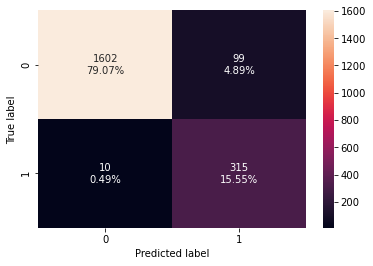

In [243]:
#Calculating different metrics
model_train_perf=model_performance_classification_sklearn(model,X_temp,y_temp)
print("Training performance:\n",model_train_perf)
model_test_perf=model_performance_classification_sklearn(model, X_test, y_test)
print("Testing performance:\n",model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(model,X_test,y_test)

The pipeline is working and the performance is still excellent on the test set.

Because we may run this model on unforseen data, there may be a range of performance capabilities once we bring it to production.

 I will run a kfold cross-validation below and give a range where we can expect this model to perform.

In [244]:
#Implementing cross validation

k = 10
kf = KFold(n_splits=k)
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        ('sampling', rus),
        ("GB", GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                          subsample= 0.9,
                                          n_estimators = 100,
                                          max_features = 0.7,
                                          random_state=1))]
)
 
result = cross_val_score(model , X_temp, y_temp, cv = kf)
f1_result = cross_val_score(model , X_temp, y_temp, cv = kf,scoring='f1')
recall_result = cross_val_score(model , X_temp, y_temp, cv = kf,scoring='recall')
precision_result = cross_val_score(model , X_temp, y_temp, cv = kf,scoring='precision')

print("Avg accuracy: {}".format(result.mean()))
print(result)

print("Avg recall: {}".format(recall_result.mean()))
print(recall_result)
 
print("Avg f1: {}".format(f1_result.mean()))
print(f1_result)
print("")
print('Accuracy = {} +/- {}'.format(np.round(mean(result),4),
                                   np.round((stdev(result))*2,4)))
print('Recall = {} +/- {}'.format(np.round(mean(recall_result),4),
                                   np.round((stdev(recall_result))*2,4)))
print('Precision = {} +/- {}'.format(np.round(mean(precision_result),4),
                                   np.round((stdev(recall_result))*2,4)))
print('F1 = {} +/- {}'.format(np.round(mean(f1_result),4),
                                   np.round((stdev(f1_result))*2,4)))

Avg accuracy: 0.939020413755309
[0.93464858 0.93333333 0.9345679  0.95185185 0.93950617 0.9382716
 0.9308642  0.92345679 0.95308642 0.95061728]
Avg recall: 0.9486878881253211
[0.93650794 0.97727273 0.90789474 0.95454545 0.94262295 0.9338843
 0.96581197 0.93277311 0.96296296 0.97260274]
Avg f1: 0.8323765581463368
[0.816609   0.82692308 0.83890578 0.86597938 0.82437276 0.81884058
 0.80141844 0.78169014 0.87248322 0.87654321]

Accuracy = 0.939 +/- 0.0198
Recall = 0.9487 +/- 0.0434
Precision = 0.7427 +/- 0.0434
F1 = 0.8324 +/- 0.0625


As we can see, this model is robust and will achieve .95 recall a great deal of the time. We can say with 95% confidence that the recall will be between .9053 and .9921 on unseen data.

Keep in mind the above is on the temp data, and so it is telling that it performed well on the test set as well given it was not tuned whatsoever on the test set.

Still, let's go ahead and compare it to the untuned undersampled XGBoost.


In [245]:
#Implementing cross validation

k = 10
kf = KFold(n_splits=k)
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        ('sampling', rus),
        ("XGB", XGBClassifier(random_state=1, eval_metric='logloss'))]
)
 
result = cross_val_score(model , X_temp, y_temp, cv = kf)
f1_result = cross_val_score(model , X_temp, y_temp, cv = kf,scoring='f1')
recall_result = cross_val_score(model , X_temp, y_temp, cv = kf,scoring='recall')
precision_result = cross_val_score(model , X_temp, y_temp, cv = kf,scoring='precision')

print("Avg accuracy: {}".format(result.mean()))
print(result)

print("Avg recall: {}".format(recall_result.mean()))
print(recall_result)
 
print("Avg f1: {}".format(f1_result.mean()))
print(f1_result)
print("")
print('Accuracy = {} +/- {}'.format(np.round(mean(result),4),
                                   np.round((stdev(result))*2,4)))
print('Recall = {} +/- {}'.format(np.round(mean(recall_result),4),
                                   np.round((stdev(recall_result))*2,4)))
print('Precision = {} +/- {}'.format(np.round(mean(precision_result),4),
                                   np.round((stdev(recall_result))*2,4)))
print('F1 = {} +/- {}'.format(np.round(mean(f1_result),4),
                                   np.round((stdev(f1_result))*2,4)))

Avg accuracy: 0.9446966859996042
[0.9568434  0.93703704 0.94074074 0.95802469 0.92962963 0.93950617
 0.94444444 0.93950617 0.94320988 0.95802469]
Avg recall: 0.9527132040574914
[0.96825397 0.97727273 0.92105263 0.95454545 0.93442623 0.9338843
 0.96581197 0.95798319 0.94814815 0.96575342]
Avg f1: 0.8463239242279899
[0.87455197 0.83495146 0.85365854 0.88111888 0.8        0.82181818
 0.83394834 0.82310469 0.84768212 0.89240506]

Accuracy = 0.9447 +/- 0.0196
Recall = 0.9527 +/- 0.0361
Precision = 0.7624 +/- 0.0361
F1 = 0.8463 +/- 0.0587


Surprisingly, this model (not-tuned XGB undersampled) performs better in cross validation than the tuned gradient boost. They are very similar in performance, but the XGBoost has a better variance.

We can say with 95% confidence that the recall of this model will range between .9167 and 0.9887. This range is superior to the previous model, with much less variance. Because of this and its slightly higher average scores, I choose this model to go into production should the bank continue to prioritize recall scores.

# Feature Importance and Analysis

I'll be using SHAP to get directionality.

In [247]:
#Defining shap variables
explainer = shap.TreeExplainer(xgb_classifier_un)
shap_values = explainer.shap_values(X)

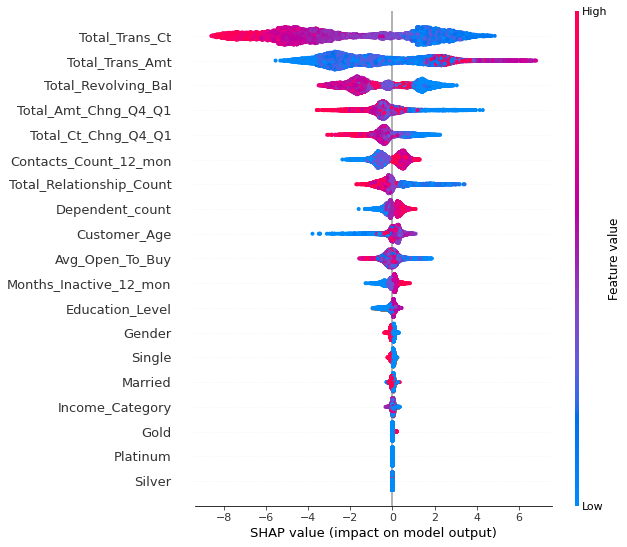

In [248]:
shap.summary_plot(shap_values, features=X, feature_names=X.columns)

As we can see from the above graph, high amounts of transaction counts strongly predicts that the customer will not churn.

However, the reverse is true for the amount of the transactions. Low amounts predict the customer will not churn.

A low revolving balance somewhat strongly predicts they will churn.

A low ratio between Q4 and Q1 implies they will churn.

Younger customers are less likely to churn.

If the customer has few relationships, they are likely to churn.

Overall, then, we can say based on this model that older customers who use our credit card occassionally throughout the year on large purchases are most likely to churn. This is aggravated by them using few of our products.

### Actionable Insights

Therefore I can recommend confidently that if the bank wishes to reduce churn, they should encourage customers to use their credit card more often on small purchases throughout the year, and to make use of other products offered by the bank.

Cash back bonuses on things such as groceries and gas would be an ideal such incentive.

Another strategy is to increase the Q4 to Q1 spending ratio, perhaps by giving holiday deals to incentivize holiday spending on our card. This would also increase the chance of a revolving balance: if such a balance exists, they are unlikely to churn.

Lastly, if a customer is frequently contacting us for one reason or another, it's a pretty clear sign they're going to churn. When they reach out we should do our best to resolve their issue.